# High-level Plotting and Data Analysis

In the following sections of this IPython Notebook we be looking at the following:

* High-level plotting
  * Historical background
  * matplotlib
  * NetworkX
  * Pandas
* Grammar of graphics
  * New styles in matplotlib
  * Bokeh
  * ggploto by ŷhat
  * Seaborn
* Data analysis
  * Pandas, SciPy, and Seaborn
  * Examining and shaping a data set
  * Analysis of Temperature, 1894-2013
  * Analysis of Precipitation, 1894-2013

Warm-up proceedures:

In [1]:
import matplotlib
matplotlib.use('nbagg')
%matplotlib inline

Let's continue with the necessary imports:

In [2]:
import calendar
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
from scipy import stats
import pandas as pd 
import statsmodels.api as sm 
from typecheck import typecheck

import sys
sys.path.append("../lib")

## High-level plotting

For our purposes, we will define high-level plotting as anything in the matplotlib world which:

1. Utilizes matplotlib APIs under the covers
1. In order to accomplish complicated plotting tasks
1. And provide an API for those tasks to the user, to employ either in conjunction with matplotlib directly, or instead of it (using matplotlib under the covers)

We will examine a couple of examples in the following sections.

Note that some obvious library choices are not dicussed in this context as they will be used in different, subsequent sections.

### Background

The world of data visualization has an interesting and eclectic history, covered quite nicely in Michael Friendly's paper [Milestones in the History of Data Visualization: A Case Study in Statistical Historiography]([2006] Friendly.pdf) with a related and quite wonderful [graphic outline](http://www.datavis.ca/milestones/) and [dedicated site](http://datavis.ca/).

Below we have provided some highlights from the history data visualization.

#### 1644 - Michael Florent van Langren

Credit for the vist visual representation of statistical data for his graph of 12 contemporary estimates for the distance from Toledo to Rome:

<img src="B02036_05_01.png" width="1000"/>

#### 1686 - Edmond Halley

A theoretical plot predicting barometric pressure vs. altitude, derived from experimental observation:

<img src="B02036_05_02.png" width="1000" />

#### 1786 - William Playfair

The first line graph, depicting English imports to and from Denmark and Norway over the course of 80 years:

<img src="B02036_05_03.png" width="1000"/>

#### 1869 - Charles Minard

A map of Napoleon's Russian Campaign of 1812 combined with a Sankey diagram depicting the successive losses of soldiers in the French Army. Note that this Sankey diagram actually predates the steam engine diagram of 1898 by Matthew Henry Phineas Riall Sankey, for whom the diagram is named.

<img src="B02036_05_03.5.png" width="1000"/>

### matplotlib

In matplotlib, the ``Sankey`` class provides what is probably one of the better examples of high-level plotting in the base library. Here's a (slightly) modified version of a ``matplotlib.sankey`` [demonstration from the matplotlib gallery](http://matplotlib.org/examples/api/sankey_demo_rankine.html):

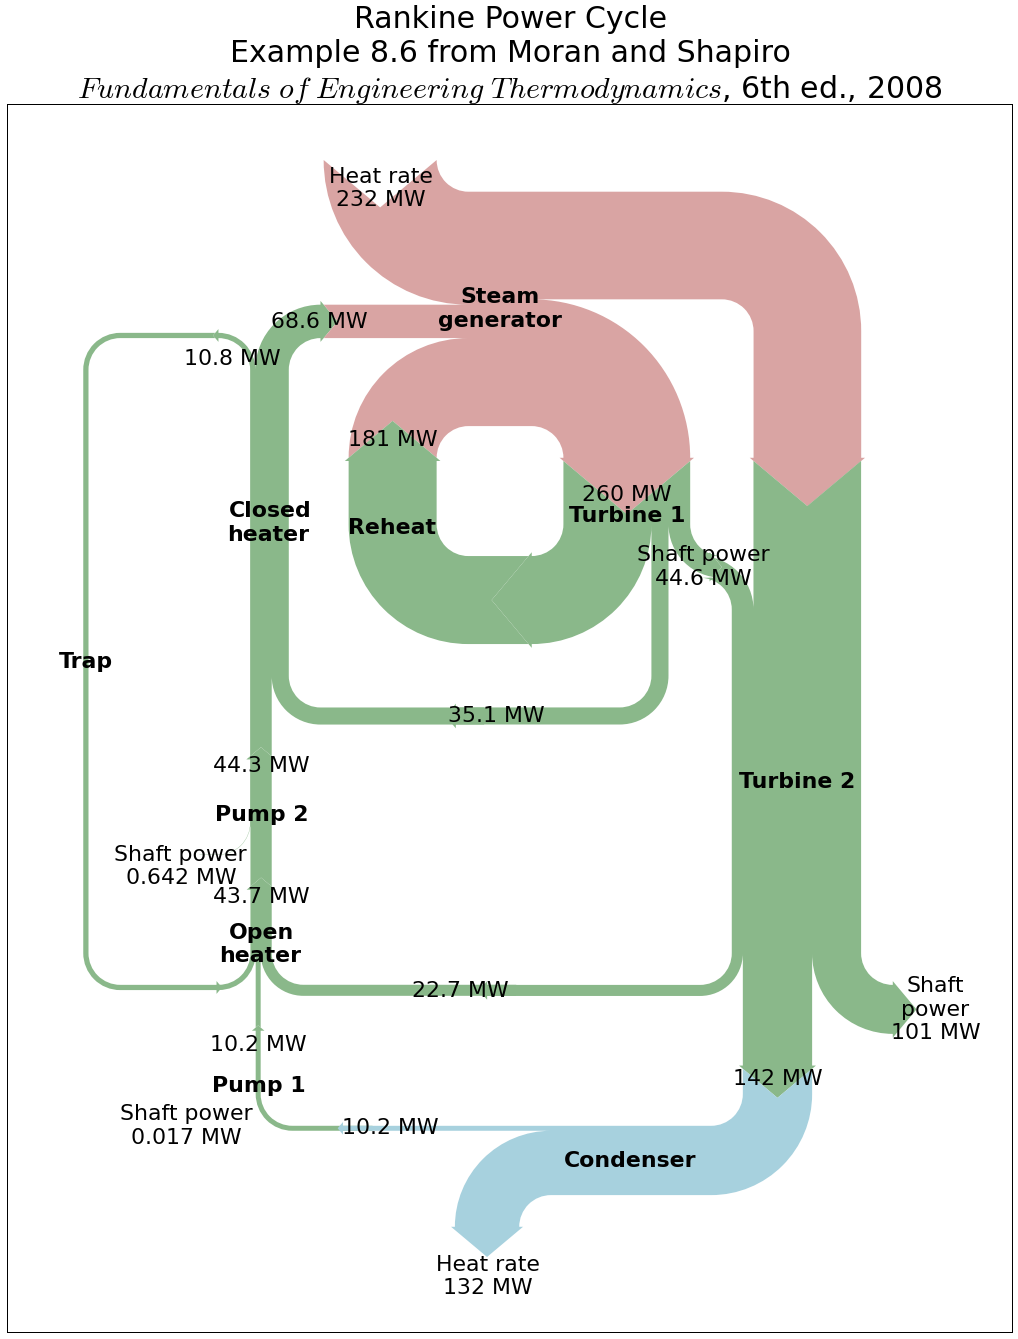

In [3]:
from matplotlib import sankey

fig = plt.figure(figsize=(18, 22))
ax = fig.add_subplot(
    1, 1, 1,
    xticks=[], yticks=[])
ax.set_title(("Rankine Power Cycle\nExample 8.6 from Moran and Shapiro\n"
              "$Fundamentals \ of \ Engineering \ Thermodynamics$, "
              "6th ed., 2008"),
             fontsize="30")
Hdot = [260.431, 35.078, 180.794, 221.115, 22.700,
        142.361, 10.193, 10.210, 43.670, 44.312,
        68.631, 10.758, 10.758, 0.017, 0.642,
        232.121, 44.559, 100.613, 132.168]
snky = sankey.Sankey(
    ax=ax, format='%.3G', unit=' MW', gap=0.5, scale=1.0/Hdot[0], margin=0.6, shoulder=0.03, radius=0.25)
snky.add(patchlabel='\n\nPump 1', rotation=90, facecolor='#8ab88a', linewidth=0,
         flows=[Hdot[13], Hdot[6], -Hdot[7]],
         labels=['Shaft power', '', None],
         pathlengths=[0.4, 0.883, 0.25],
         orientations=[1, -1, 0])
snky.add(patchlabel='\n\nOpen\nheater', facecolor='#8ab88a', linewidth=0,
         flows=[Hdot[11], Hdot[7], Hdot[4], -Hdot[8]],
         labels=[None, '', None, None],
         pathlengths=[0.25, 0.25, 1.93, 0.25],
         orientations=[1, 0, -1, 0], prior=0, connect=(2, 1))
snky.add(patchlabel='\n\nPump 2', facecolor='#8ab88a', linewidth=0,
         flows=[Hdot[14], Hdot[8], -Hdot[9]],
         labels=['\nShaft power', '', None],
         pathlengths=[0.4, 0.25, 0.25],
         orientations=[1, 0, 0], prior=1, connect=(3, 1))
snky.add(patchlabel='Closed\nheater', trunklength=2.914, fc='#8ab88a', linewidth=0,
         flows=[Hdot[9], Hdot[1], -Hdot[11], -Hdot[10]],
         pathlengths=[0.25, 1.543, 0.25, 0.25],
         labels=['', '', None, None],
         orientations=[0, -1, 1, -1], prior=2, connect=(2, 0))
snky.add(patchlabel='Trap', facecolor='#8ab88a', linewidth=0, trunklength=5.102,
         flows=[Hdot[11], -Hdot[12]],
         labels=['\n', None],
         pathlengths=[1.0, 1.01],
         orientations=[1, 1], prior=3, connect=(2, 0))
snky.add(patchlabel='Steam\ngenerator', facecolor='#d9a4a3', linewidth=0,
         flows=[Hdot[15], Hdot[10], Hdot[2], -Hdot[3], -Hdot[0]],
         labels=['Heat rate', '', '', None, None],
         pathlengths=0.25,
         orientations=[1, 0, -1, -1, -1], prior=3, connect=(3, 1))
snky.add(patchlabel='\n\n\nTurbine 1\n', facecolor='#8ab88a', linewidth=0,
         flows=[Hdot[0], -Hdot[16], -Hdot[1], -Hdot[2]],
         labels=['', None, None, None],
         pathlengths=[0.25, 0.153, 1.543, 0.25],
         orientations=[0, 1, -1, -1], prior=5, connect=(4, 0))
snky.add(patchlabel='\n\n\nReheat', facecolor='#8ab88a', linewidth=0,
         flows=[Hdot[2], -Hdot[2]],
         labels=[None, None],
         pathlengths=[0.725, 0.25],
         orientations=[-1, 0], prior=6, connect=(3, 0))
snky.add(patchlabel='Turbine 2', trunklength=3.212, facecolor='#8ab88a', linewidth=0,
         flows=[Hdot[3], Hdot[16], -Hdot[5], -Hdot[4], -Hdot[17]],
         labels=[None, 'Shaft power', None, '', 'Shaft\npower'],
         pathlengths=[0.751, 0.15, 0.25, 1.93, 0.25],
         orientations=[0, -1, 0, -1, 1], prior=6, connect=(1, 1))
snky.add(patchlabel='Condenser', facecolor='#a7d1de', linewidth=0, trunklength=1.764,
         flows=[Hdot[5], -Hdot[18], -Hdot[6]],
         labels=['', 'Heat rate', None],
         pathlengths=[0.45, 0.25, 0.883],
         orientations=[-1, 1, 0], prior=8, connect=(2, 0))
diagrams = snky.finish()

for diagram in diagrams:
    diagram.text.set_fontweight('bold')
    diagram.text.set_fontsize('22')
    for text in diagram.texts:
        text.set_fontsize('22')
        
# Notice that the explicit connections are handled automatically, but the
# implicit ones currently are not. The lengths of the paths and the trunks
# must be adjusted manually, and that is a bit tricky.

plt.show()

A more common example is code you would write in your own projects. For instance, if you recall from the notebook covering the matplotlib APIs, we created a module to demonstrate the object-oriented API for programmatic workflows. That little module is a perfect example of high-level plotting with matplotlib.

### NetworkX

As we saw in the *architecture* notebook, NetworkX provides high-level matplotlib plotting support for its graphs. Below is another exmple, this one adapted from the [NetworkX gallery](https://networkx.github.io/documentation/latest/examples/drawing/lanl_routes.html). Let's look at the code comments in particular right now:

graph has 1358 nodes with 1363 edges
11 connected components


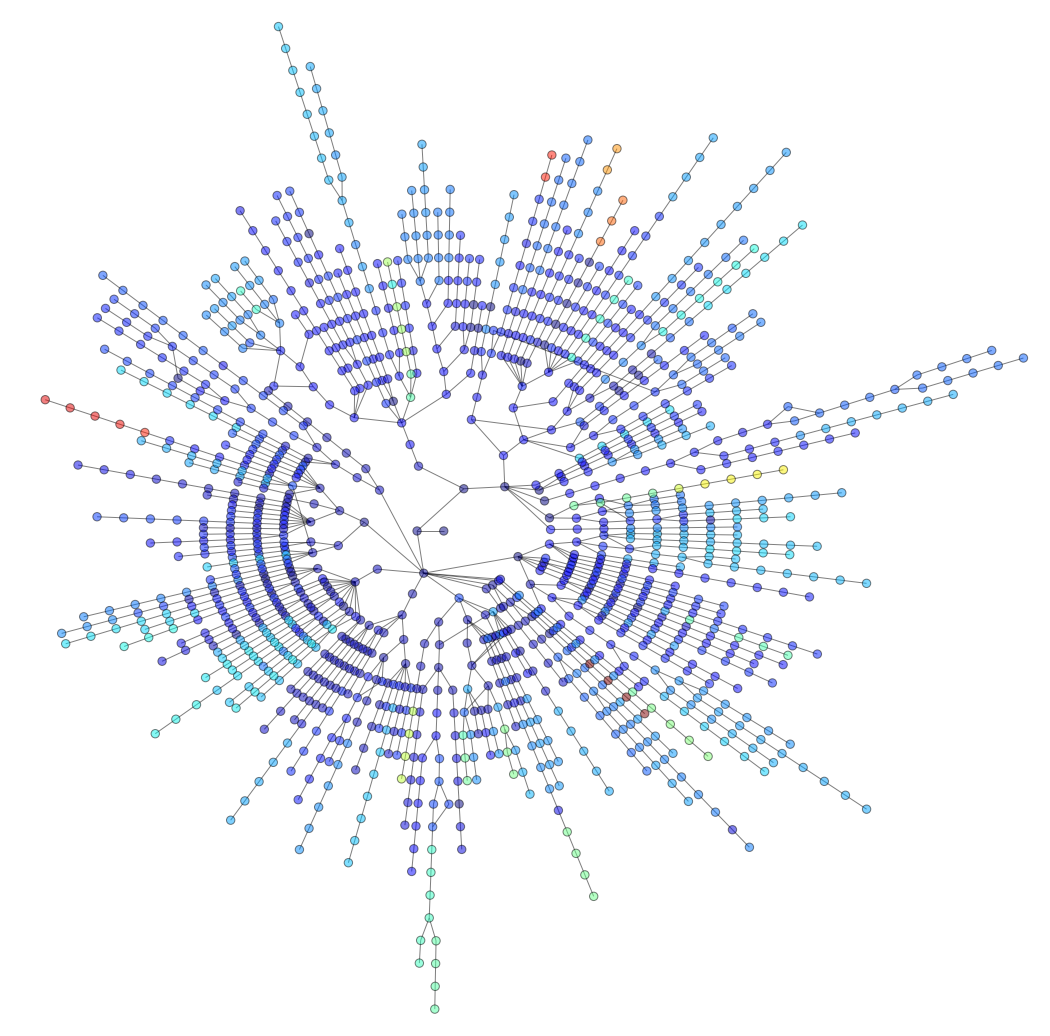

In [4]:
import lanl

# Set up the plot's figure instance
plt.figure(figsize=(14,14))

# Generate the data graph structure representing the route relationships
G = lanl.get_routes_graph(debug=True)

# Perform the high-level plotting operations in NetworkX
pos = nx.graphviz_layout(G, prog="twopi", root=0)
nx.draw(G, pos,
        node_color=[G.rtt[v] for v in G],
        with_labels=False,
        alpha=0.5,
        node_size=70)

# Update the ranges
xmax = 1.02 * max(xx for xx, _ in pos.values())
ymax = 1.02 * max(yy for _, yy in pos.values())

# Final matplotlib tweaks and rendering
plt.xlim(0, xmax)
plt.ylim(0, ymax)
plt.show()

Like we saw when creating a graph that would neatly render the matplotlib module layout in accordance with the philosophy of its architecture, Aric Hagberg had to do something similar when rendering the Internet routes from Los Alamos National Laboratory. We've put this code in the ``lanl`` module for this notebook repo; it's where all the logic is defined for converting the route data to graph relationships.

We can see how NetworkX acts as a high-level plotting library by taking a look at some of the functions and related objects we used above. Let's start with the layout function. NetworkX provides several possible graph library backends, and to do so in a manner that makes it easier for the end user, some of the imports can be quite obscured. Let's get the location of the ``graphviz_layout`` function the easy way:

In [5]:
nx.graphviz_layout

<function networkx.drawing.nx_agraph.graphviz_layout>

Taking a look at [that file](https://github.com/networkx/networkx/blob/v1.9.1/networkx/drawing/nx_agraph.py), we can see that ``graphviz_layout`` wraps the ``pygraphviz_layout`` function. From there, we see that NetworkX is converting pygraphviz's node data structure to something general that can be used for all backends. We're already several layers deep in NetworkX's high-level API internals.

Next, let's take a look at the function that uses this node data, ``nx.draw``:

In [6]:
nx.draw

<function networkx.drawing.nx_pylab.draw>

Now we're getting close to matplotlib! The [nx_pylab module](https://github.com/networkx/networkx/blob/v1.9.1/networkx/drawing/nx_pylab.py)'s ``draw`` function makes direct use of ``matplotlib.pyplot`` in order to:

* Get the current figure from ``pyplot``
* Or, if it exists, from the axes object
* Hold and un-hold the matplotlib figures
* Call a matplotlib draw function

It also makes a subsequent call to the NetworkX graph backend to draw the actual edges and nodes. Theses additional calls get node, edge, and label data and make further calls to matplotlib draw functions. None of which we have to do; we simply call ``nx.draw`` (with appropriate parameters).

### Pandas

The next example is from a library whose purpose is to provide Python users and developers extensive support for high-level data analysis. Pandas offers several highly performant data structures for this purpose, in large part built around the NumPy scientific computing library. Of these, Pandas incorporates plotting functionality into the ``Series`` and ``DataFrame`` data structures.

Let's take a look a``DataFrame`` example where we generate some random data and then utilize the plot function made available on ``DataFrame`` (taken from the [Pandas documentation on visualization](http://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html), with adaptations).

Random data samples, using a [Rayleigh distribution](http://en.wikipedia.org/wiki/Rayleigh_distribution):

In [7]:
from scipy.stats import norm, rayleigh

a = rayleigh.rvs(loc=5, scale=2, size=1000) + 1
b = rayleigh.rvs(loc=5, scale=2, size=1000)
c = rayleigh.rvs(loc=5, scale=2, size=1000) - 1

Create a Pandas data structure instance:

In [8]:
data = pd.DataFrame({"a": a, "b": b, "c": c}, columns=["a", "b", "c"])

Let's take a look at a histogram plot of this data:

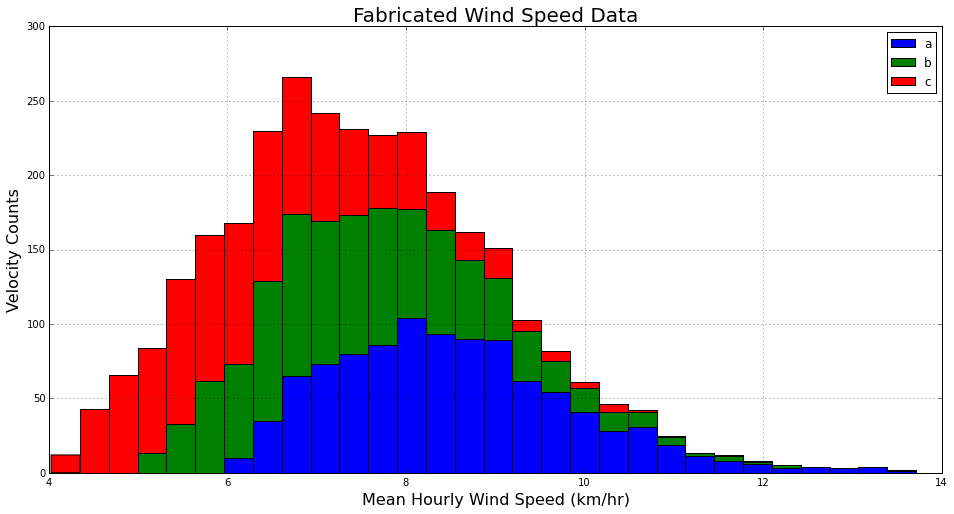

In [9]:
axes = data.plot(kind="hist", stacked=True, bins=30, figsize=(16, 8))
axes.set_title("Fabricated Wind Speed Data", fontsize=20)
axes.set_xlabel("Mean Hourly Wind Speed (km/hr)", fontsize=16)
_ = axes.set_ylabel("Velocity Counts", fontsize=16)

So what's going on here? Well, if you take a dive into the Pandas codebase, you'll find that there are wrappers in ``pandas.tools.plotting`` that do a bunch of work under the covers to make plotting from the ``DataFrame`` object an exercise in simplicity. In particular, look at ``plotting.plot_frame`` and ``plotting._plot``.

## Grammar of graphics

The *Grammar of Graphics* has done for the world of statistical data plotting and visualization what *Design Patterns* did for a subset of programming, and *A Pattern Language* did for architecture and urban design. The *Grammar of Graphics* explores the space of data, its graphical representation, the human minds that view these, and the ways in which these are connected, both obviously and subtly. The book provides a conceptual framework for the cognitive analysis of our statistical tools and how we can make them better, allowing us to ultimately create visualizations that are more clear, meaningful, and reveal more of the underlying problem space.

The first software implementation that was inspired by the Grammar of Graphics was SPSS's nViZn (based on work done in 1996). This was followed by:
 * R's ggplot by Hadley Wickham (2005)
 * R's ggplot2 also by Hadley Wickham, a complete rewrite of ggplot (2007)
 * Python's Bokeh by Peter Wang (2012; the first commit had a Python ggplot module)
 * Python's Seaborn by Michael Waskom (2012)
 * Python's ggplot by ŷhat (2013; originally named yagg, "yet another ggplot")
 * matplotlib released with support for a ggplot style (2014)
 
Let's take a look at Python ones, starting with Bokeh.

### Bokeh

One of the first Python libraries to explore the space of Grammar of Graphics is the [Bokeh](http://bokeh.pydata.org/en/latest/) project. In many ways, Bokeh views itself as a natural successor to matplotlib, offering their view of improvements in overall architecture, scalability, size of problem set data, APIs, and usability. In contrast to matplotlib, Bokeh focuses its attention in the web browser.

The Bokeh project gallery is full of very intersting examples, but one of the most unusual and aesthetically pleasing is the re-creation of the [Will Burtin](https://en.wikipedia.org/wiki/Will_Burtin) antibiotics chart (a copy of the 1951 original diagram is available in [this pdf](http://qssi.psu.edu/files/MonroeBurtin.pdf)).

Let's set up Bokeh for use in an IPython notebook:


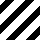
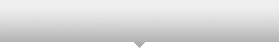
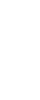
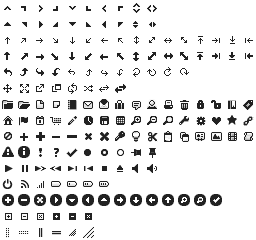
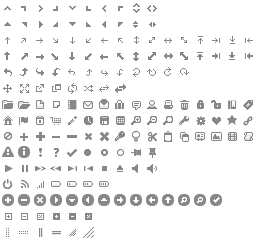
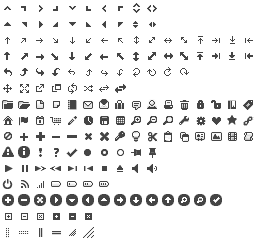
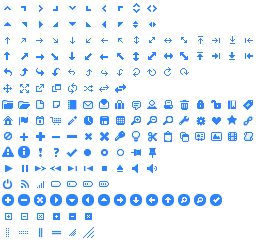
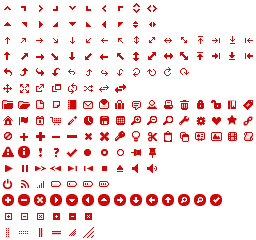
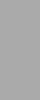
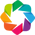
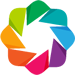
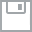
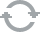
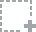
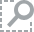
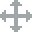
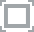
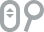

In [10]:
from bokeh.plotting import output_notebook
output_notebook()

The [Bokeh example](http://bokeh.pydata.org/en/latest/docs/gallery/burtin.html) has been saved to this notebook's repo (and modified slightly); you can load it up with the following:

In [11]:
import burtin

Since this series of notebooks are focused on matplotlib (and not Bokeh!), we won't go into too much detail, but it is definitely worth mentioning that Bokeh provides a [matplotlib compatibility layer](http://bokeh.pydata.org/en/latest/docs/reference/compat.html). It doesn't cover 100% of all matplotlib API usage a given project may entail, but enough so that one should be able to very easily incorporate Bokeh into existing matplotlib projects.

### ŷhat ggplot

The folks at ŷhat have a great reputation for expertise in maching learning and statistical computing in genereal. They are users of not only the R programming language, but Python and Julia as well. They created ggplot for Python because they really wanted to have the R ggplot2 experience in Python, not just use libraries that were *inspired* by it. From the github [project README](https://github.com/yhat/ggplot), ggplot has the following goals:
 * same API as ggplot2 for R
 * ability to use both American and British English spellings of aesthetics
 * tight integration with Pandas
 * pip installable

In particular, they wanted anyone coming from R to Python to have a nearly identical API experience. We can see this reflected in the code they shared in their [blog post](http://blog.yhathq.com/posts/ggplot-for-python.html) about it:

**Example usage in R**

```R
library(ggplot2)

ggplot(meat, aes(date,beef)) + 
  geom_line(colour='black') + 
  scale_x_date(breaks=date_breaks('7 years'),labels = date_format("%b %Y")) + 
  scale_y_continuous(labels=comma)
```

**In Python**

```python
from ggplot import *

ggplot(meat, aes('date','beef')) + \
    geom_line(color='black') + \
    scale_x_date(breaks=date_breaks('7 years'), labels='%b %Y') + \
    scale_y_continuous(labels='comma')
```

**In pure matplotlib**

```python
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter
from ggplot import meat

tick_every_n = YearLocator(7)
date_formatter = DateFormatter('%b %Y')
x = meat.date
y = meat.beef
fig, ax = plt.subplots()
ax.plot(x, y, 'black')
ax.xaxis.set_major_locator(tick_every_n)
ax.xaxis.set_major_formatter(date_formatter)
fig.autofmt_xdate()
plt.show()
```

Furthermore, the rendered outputs of those two are also nearly identical.

ggplot is a high-level implementation that uses matplotlib under the hood. Let's import it and try out some of their examples in IPython. Since we're not trying to adhere to the exact experience of R, we'll use explicit imports.

In [12]:
import ggplot
from ggplot import components, geoms, scales, stats
from ggplot import exampledata

Here's a quick look at some movie data collected over the 20th century:

<repr(<ggplot.ggplot.ggplot at 0x111fd4f98>) failed: KeyError: 0>

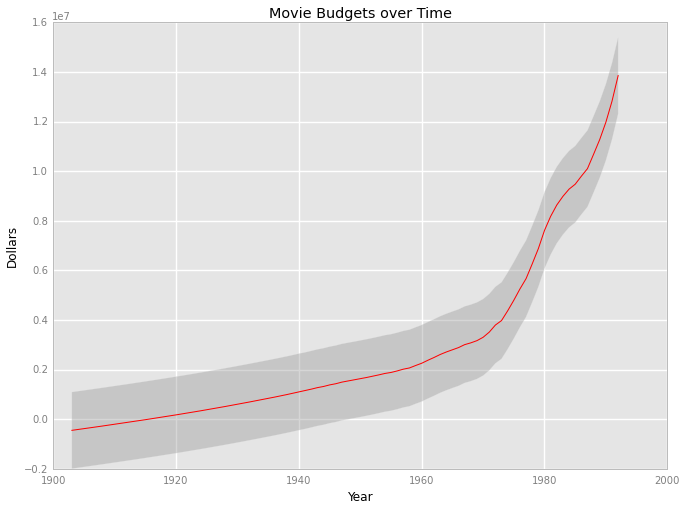

In [13]:
data = exampledata.movies
aesthetics = components.aes(x='year', y='budget')

(ggplot.ggplot(aesthetics, data=data) +
 stats.stat_smooth(span=.15, color='red', se=True) +
 geoms.ggtitle("Movie Budgets over Time") +
 geoms.xlab("Year") + 
 geoms.ylab("Dollars"))

Views of data collected on the cuts and qualities of diamonds:

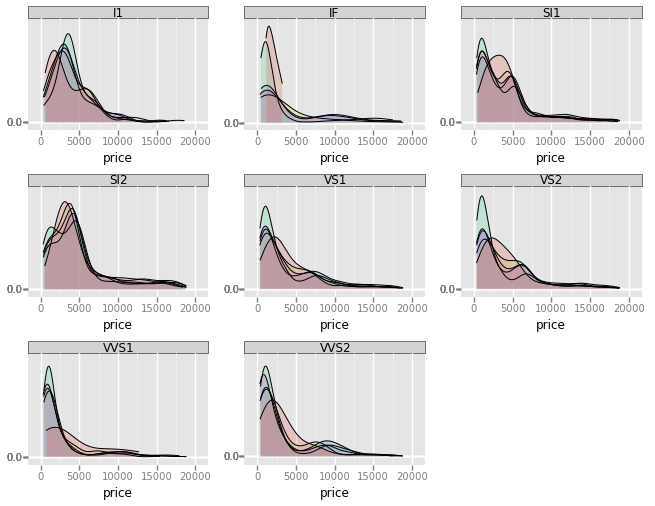

<ggplot: (-9223372036567477104)>

In [14]:
data = exampledata.diamonds
aesthetics = components.aes(x='price', fill='cut')

(ggplot.ggplot(aesthetics, data=data) +
 geoms.geom_density(alpha=0.25) +
 geoms.facet_wrap("clarity"))

ggplot offers some nice color options that, when used effectively, can be more revealing of data in hidden relationships. The following are examples of ggplot's support for [ColorBrewer](http://colorbrewer2.org/):

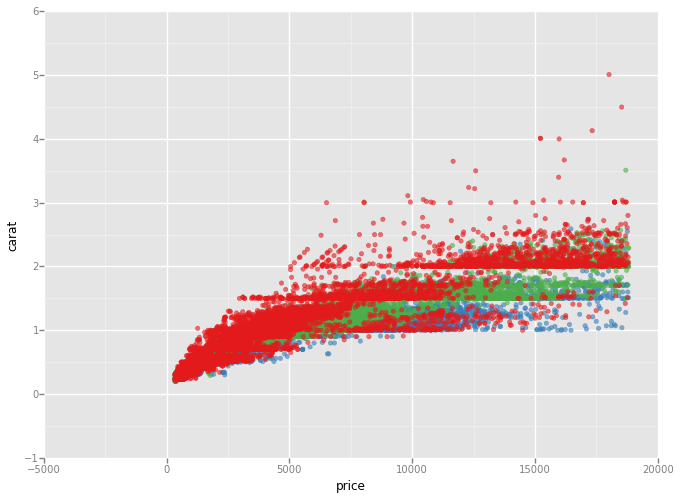

<ggplot: (284568584)>

In [15]:
aesthetics = components.aes(x='price', y='carat', color='clarity')
plot = ggplot.ggplot(aesthetics, data=data)
point = geoms.geom_point(alpha=0.6)
(plot +
 point +
 scales.scale_color_brewer(type='qual', palette='Set1'))

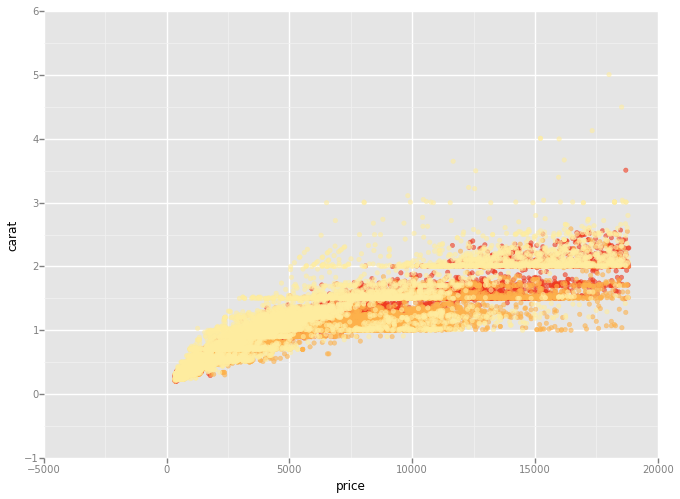

<ggplot: (287298736)>

In [16]:
(plot +
 point +
 scales.scale_color_brewer(type='seq', palette='YlOrRd'))

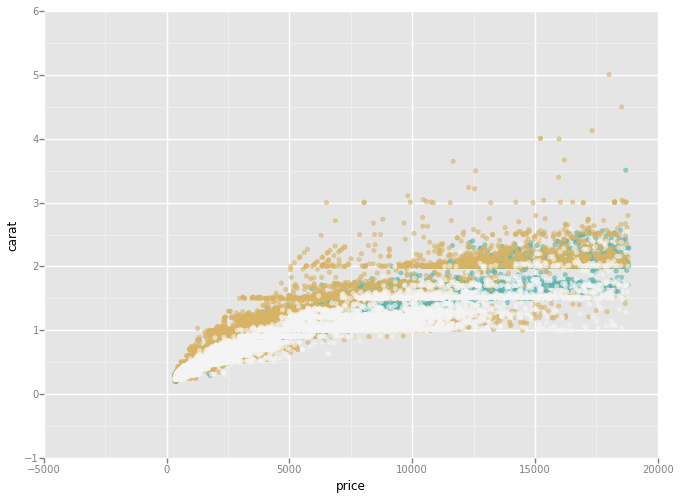

<ggplot: (288702784)>

In [17]:
(plot +
 point +
 scales.scale_color_brewer(type='div', palette='BrBg'))

There is a great deal more to explore with ggplot. Be sure to check out:
 * the [main site](http://ggplot.yhathq.com/)
 * the [docs](http://ggplot.yhathq.com/docs/index.html)
 * the Github [repo](https://github.com/yhat/ggplot)

### New styles in matplotlib

matplotlib has recently added support for ggplot styling. Let's contrast it with the defaults. First, import the demo code:

In [18]:
import mplggplot

Now let's take a look at the default styling of some plots:

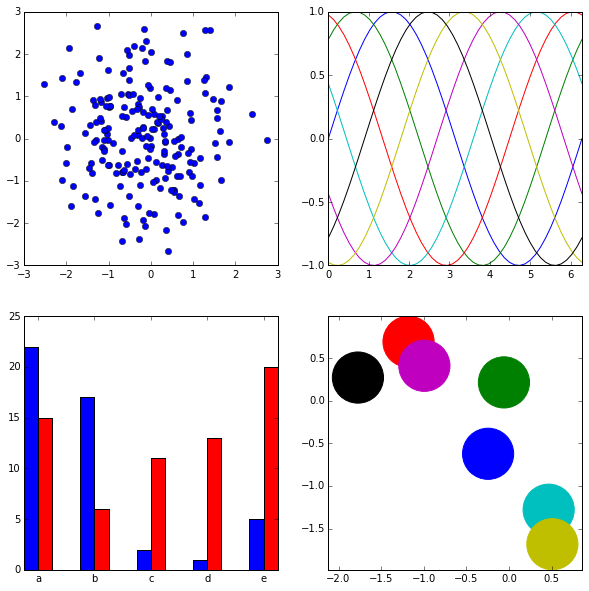

In [19]:
figure, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))
mplggplot.demo(axes)
plt.show()

Though we are looking at the ggplot style here, there are actually several styles to choose from. Here's the list of the available ones:

In [20]:
plt.style.available

['bmh', 'dark_background', 'fivethirtyeight', 'ggplot', 'grayscale']

Now we'll select "ggplot" and re-render our demo plots:

In [21]:
plt.style.use('ggplot')

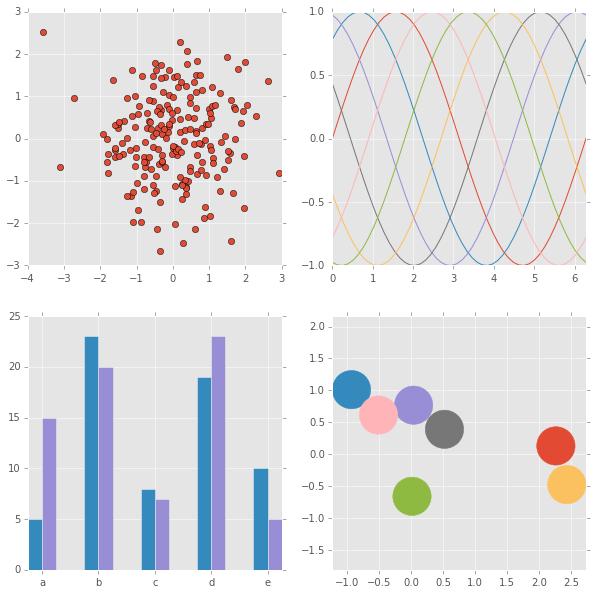

In [22]:
figure, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))
mplggplot.demo(axes)
plt.show()

It's not really a wonder that ggplot has so much appeal in the community :-)

### Seaborn

As noted, the development of seaborn has been greatly inspired by the Grammar of Graphics and R's ggplot in particular. Here's what the notes say on the seaborn site:

<blockquote>
Seaborn aims to make visualization a central part of exploring and understanding data. The plotting functions operate on dataframes and arrays containing a whole dataset and internally perform the necessary aggregation and statistical model-fitting to produce informative plots. Seaborn’s goals are similar to those of R’s ggplot, but it takes a different approach with an imperative and object-oriented style that tries to make it straightforward to construct sophisticated plots. If matplotlib “tries to make easy things easy and hard things possible”, seaborn aims to make a well-defined set of hard things easy too.
</blockquote>

We've already used seaborn in the other notebooks, so it shouldn't be too new to you now, but let's run a couple of the samples from the seaborn gallery to further expose you to some of its visual goodness.

Let's import seaborn and set up the styles we'll use for the rest of the notebook, and then look at a few seaborn examples.

In [23]:
import seaborn as sns

pallete_name = "husl"
colors = sns.color_palette(pallete_name, 8)
colors.reverse()
cmap = mpl.colors.LinearSegmentedColormap.from_list(pallete_name, colors)

#### Scatter Plot Matrices

Scatter plots offer a unique view on multivariate data sets, allowing one to see what sorts of correlations exist between variables, if any. Here is the famous "iris" data set in a seaborn ``pairplot`` scatter plot matrix which focuses on pair-wise relationships:

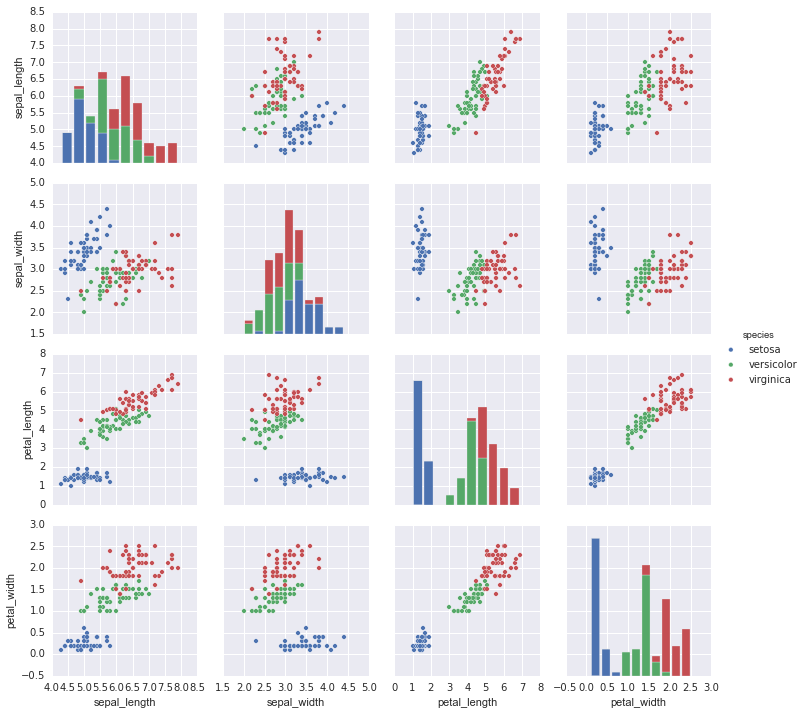

In [24]:
sns.set()
data_frame = sns.load_dataset("iris")
_ = sns.pairplot(data_frame, hue="species", size=2.5)

#### Facet Grids

When you want to split up a data set by one or more variables, and then group subplots of these separated variables, you probably want to use a facet grid. Another use case is for examining repeated runs of an experiment to reveal potentially conditional relationships between variables. Below is a concocted instance of the latter from the seaborn examples. It displaying data from a generated data set simulating repeated observations of walking behaviour, examining positions of each step of a multi-step walk.

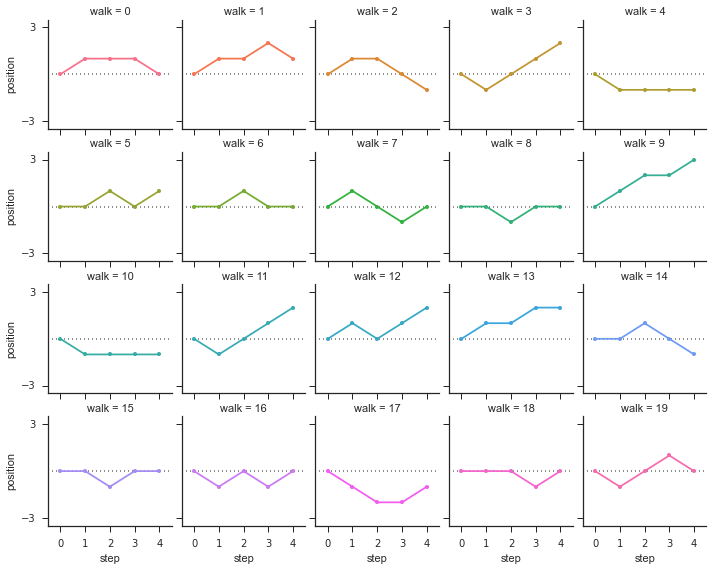

In [25]:
import seademo

sns.set(style="ticks")

data = seademo.get_data_set()

grid = sns.FacetGrid(data, col="walk", hue="walk", col_wrap=5, size=2)
grid.map(plt.axhline, y=0, ls=":", c=".5")
grid.map(plt.plot, "step", "position", marker="o", ms=4)
grid.set(xticks=np.arange(5), yticks=[-3, 3],
         xlim=(-.5, 4.5), ylim=(-3.5, 3.5))
grid.fig.tight_layout(w_pad=1)

#### Violin Plots

Violin plots are similar to box plots (the latter of which we will see more use of below in the "Data Analysis" section). Where box plots display variation in samples of a statistical population with different parts of the box indicating the degree of spread (among other things), the violin plot provide insight on the probability density at different values.

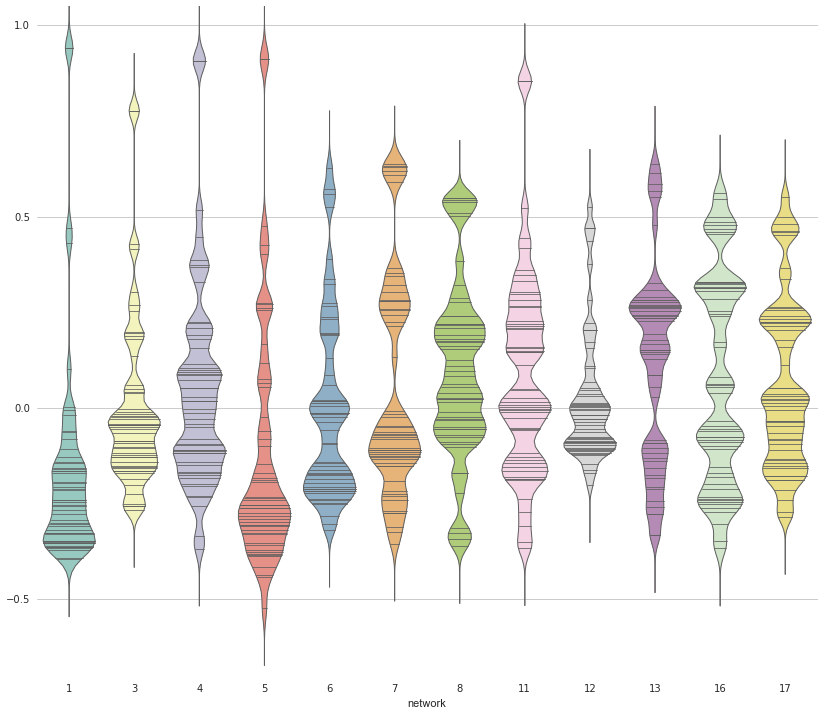

In [26]:
sns.set(style="whitegrid")

df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)
used_networks = [1, 3, 4, 5, 6, 7, 8, 11, 12, 13, 16, 17]
level_values = df.columns.get_level_values("network").astype(int)
used_columns = level_values.isin(used_networks)
df = df.loc[:, used_columns]

corr_df = df.corr().groupby(level="network").mean()
corr_df.index = corr_df.index.astype(int)
corr_df = corr_df.sort_index().T

(figure, axes) = plt.subplots(figsize=(14, 12))
sns.violinplot(corr_df, color="Set3", bw=0.1, cut=1.5,
               lw=1, inner="stick", inner_kws={"ms": 6})
axes.set(ylim=(-0.7, 1.05))
sns.despine(left=True, bottom=True)

This concludes our overview of high-level plotting with regard to the topic of the Grammar of Graphics in the Python (and especially matplotlib) world.

Next we will look at high-level plotting examples in the context of a particular data set and various methods for analyzing trends in that data.

## Data analysis

This next section will cover the use of matplotlib and some of the realted Python libraries from the scientific computing ecosystem in order to explore more facets of high-level plotting, but with a focus on the practical, hands-on aspect.

### Pandas, SciPy, and Seaborn

In this section on data analysis, we will be making heavy use of the Pandas, SciPy, and Seaborn libraries. Here is a quick review of each:

* [Pandas](http://pandas.pydata.org/) - Python has long been great for data munging and preparation, but less so for data analysis and modeling. pandas helps fill this gap, enabling you to carry out your entire data analysis workflow in Python without having to switch to a more domain specific language like R.
* [SciPy](http://scipy.org/scipylib/) - The SciPy library is one of the core packages that make up the SciPy stack. It provides many user-friendly and efficient numerical routines such as routines for numerical integration and optimization; clustering; image analysis and singal processing; and statistics, among others.
* [Seaborn](http://stanford.edu/~mwaskom/software/seaborn/) - Seaborn aims to make visualization a central part of exploring and understanding data. The plotting functions operate on dataframes and arrays containing a whole dataset and internally perform the necessary aggregation and statistical model-fitting to produce informative plots. Seaborn’s goals are similar to those of R’s ggplot, but it takes a different approach with an imperative and object-oriented style that tries to make it straightforward to construct sophisticated plots. If matplotlib “tries to make easy things easy and hard things possible”, seaborn aims to make a well-defined set of hard things easy too.

### Examining and shaping a data set

Let's do the imports we will need and set the Seaborn style for our plots:

In [27]:
sns.set(style="darkgrid")

For the following sections we will be using the precipitation and temperature data for Saint Francis, Kansas, USA, from 1894 to 2013. You can obtain CSV files for weather stations that interest you from the [United States Historical Climatology Network](http://cdiac.ornl.gov/epubs/ndp/ushcn/ushcn_map_interface.html).

Let's load the CSV data that's been prepared for us, using the Pandas CSV converter:

In [28]:
data_file = "../data/KS147093_0563_data_only.csv"
data = pd.read_csv(data_file)

This will have read the data in and instantiated a Pandas ``DataFrame`` object, converting the first row to column data:

In [29]:
data.columns

Index(['State ID', 'Year', 'Month', 'Precipitation (in)', 'Mean Temperature (F)'], dtype='object')

Here's what the data set looks like (well, the first bit of it, anyway):

In [30]:
data.head()

State ID  Year  Month  Precipitation (in)  Mean Temperature (F)
0  '147093'  1894      1                0.43                  25.4
1  '147093'  1894      2                0.69                  22.5
2  '147093'  1894      3                0.45                  42.1
3  '147093'  1894      4                0.62                  53.7
4  '147093'  1894      5                0.64                  62.9

We'd like to see the "Month" data as names rather than numbers, so let's update that (but let's create a copy of the original, in case we need it later). We will be using month numbers and names later, so we'll set those now as well.

In [31]:
data_raw = pd.read_csv(data_file)
month_nums = list(range(1, 13))
month_lookup = {x: calendar.month_name[x] for x in month_nums}
month_names = [x[1] for x in sorted(month_lookup.items())]
data["Month"] = data["Month"].map(month_lookup)
data.head()

State ID  Year     Month  Precipitation (in)  Mean Temperature (F)
0  '147093'  1894   January                0.43                  25.4
1  '147093'  1894  February                0.69                  22.5
2  '147093'  1894     March                0.45                  42.1
3  '147093'  1894     April                0.62                  53.7
4  '147093'  1894       May                0.64                  62.9

That's better :-)

We're going to make repeated use of some of this data more than others, so let's pull those bits out:

In [32]:
years = data["Year"].values
temps_degrees = data["Mean Temperature (F)"].values
precips_inches = data["Precipitation (in)"].values

Let's confirm the date range we're working with:

In [33]:
years_min = data.get("Year").min()
years_min

1894

In [34]:
years_max = data.get("Year").max()
years_max

2013

Let's set get the maximum and minimum values for our mean temperature and precipitation data:

In [35]:
temp_max = data.get("Mean Temperature (F)").max()
temp_max

81.799999999999997

In [36]:
temp_min = data.get("Mean Temperature (F)").min()
temp_min

13.199999999999999

In [37]:
precip_max = data.get("Precipitation (in)").max()
precip_max

11.31

In [38]:
precip_min = data.get("Precipitation (in)").min()
precip_min

0.0

Next, we'll create a Pandas [pivot table](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.tools.pivot.pivot_table.html), providing us with a convenient view of our data (making some of our analysis tasks much easier). If we use our converted data frame here (the one where we updated month numbers to names), our table will have the data in alphabetical order by month. As such, we'll want to use the raw data (the copy we made before converting), and only once it has been put into a pivot table (in numerical order) will we update it with month names.

Here's how:

In [39]:
temps = data_raw.pivot("Month", "Year", "Mean Temperature (F)")
temps.index = [calendar.month_name[x] for x in temps.index]
temps

Year       1894  1895  1896  1897  1898  1899  1900  1901  1902  1903  ...   \
January    25.4  23.0  31.6  26.5  28.0  25.6  32.7  27.6  26.8  30.3  ...    
February   22.5  21.3  35.5  30.3  34.4  15.1  26.6  24.1  29.7  21.4  ...    
March      42.1  36.8  35.6  37.0  35.6  32.9  40.2  35.9  40.0  36.2  ...    
April      53.7  54.2  52.2  49.1  50.4  48.9  50.6  47.8  50.7  49.6  ...    
May        62.9  61.1  63.6  61.5  55.6  59.8  61.5  59.2  62.7  56.9  ...    
June       69.8  66.5  69.9  68.0  69.9  69.9  72.7  70.9  67.0  63.2  ...    
July       75.8  70.4  75.2  75.5  72.7  73.3  74.8  79.7  72.4  73.5  ...    
August     72.5  72.9  73.5  74.1  74.7  75.1  76.1  74.1  74.0  70.9  ...    
September  64.3  67.1  60.5  69.1  61.6  65.3  63.6  62.7  59.3  61.8  ...    
October    51.7  50.7  51.3  53.1  46.5  51.9  55.5  52.3  52.3  52.1  ...    
November   39.7  33.6  29.8  38.2  32.4  41.5  37.8  41.0  38.4  39.0  ...    
December   30.6  27.2  37.0  24.7  24.2  27.2  32.6  27.8  23.8  32.1  ...    

Year       2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  
January    31.6  30.8  39.9  18.6  26.1  32.8  29.8  28.1  33.9  29.6  
February   32.2  39.2  32.3  26.3  32.8  37.4  29.0  27.0  32.6  32.1  
March      46.1  42.3  40.2  48.7  41.3  41.0  41.3  41.0  50.6  37.7  
April      51.6  49.9  53.2  47.9  47.2  47.9  51.4  50.3  55.6  44.3  
May        63.7  59.2  61.8  62.8  58.6  60.4  55.8  56.9  62.9  60.7  
June       68.2  71.5  73.9  70.2  68.4  69.2  71.9  70.7  76.3  72.3  
July       72.9  78.3  79.0  77.4  77.3  73.8  77.4  79.8  81.0  75.8  
August     70.7  74.7  74.2  77.2  73.0  72.0  76.4  77.3  74.6  76.6  
September  68.6  69.0  59.4  67.6  63.6  62.1  66.7  62.1  65.4  70.2  
October    54.2  53.6  50.9  54.8  53.0  43.7  54.8  53.4  50.6  50.7  
November   39.8  44.1  41.5  42.0  42.9  43.2  39.7  40.3  43.6  39.4  
December   33.7  30.6  31.2  24.3  28.0  23.6  33.0  30.5  29.8  29.1  

[12 rows x 120 columns]

Let's do the the same thing for precipitation:

In [40]:
precips = data_raw.pivot("Month", "Year", "Precipitation (in)")
precips.index = [calendar.month_name[x] for x in precips.index]
precips

Year       1894  1895  1896  1897  1898  1899  1900  1901  1902  1903  ...   \
January    0.43  0.30  0.31  0.17  0.16  0.26  0.01  0.06  0.14  0.13  ...    
February   0.69  0.89  0.08  0.42  0.05  0.52  0.99  0.35  0.22  1.83  ...    
March      0.45  0.21  0.95  2.16  0.27  1.00  0.58  2.97  0.97  0.37  ...    
April      0.62  1.24  3.54  2.75  1.90  0.37  3.09  2.70  0.74  1.08  ...    
May        0.64  2.70  2.34  0.32  5.14  2.89  0.90  0.70  3.76  4.10  ...    
June       2.54  2.70  3.71  3.38  3.50  3.04  2.27  3.37  3.56  1.47  ...    
July       1.59  4.36  1.72  1.69  1.17  3.74  3.55  1.85  3.48  4.16  ...    
August     0.69  2.24  2.56  3.94  1.16  1.80  2.48  4.96  1.69  2.49  ...    
September  0.69  1.03  1.14  1.61  3.87  0.25  0.52  3.67  3.94  0.75  ...    
October    0.26  0.48  1.55  4.04  0.68  0.04  0.13  0.46  1.32  0.30  ...    
November   0.03  0.69  0.14  0.23  0.37  1.54  0.13  0.01  0.06  0.44  ...    
December   0.54  0.76  0.31  0.67  0.34  0.19  0.31  0.89  1.13  0.09  ...    

Year       2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  
January    0.17  0.13  0.11  0.44  0.03  0.11  0.10  0.21  0.04  0.17  
February   0.71  0.06  0.00  0.38  0.22  0.67  0.28  0.66  0.67  0.40  
March      0.38  0.61  0.59  1.03  0.42  0.30  1.48  0.68  0.16  0.98  
April      2.51  1.52  0.47  1.91  1.06  2.32  2.61  2.07  4.34  0.57  
May        1.19  2.02  0.74  0.76  0.79  3.54  1.75  4.78  0.86  1.57  
June       2.17  5.55  2.62  3.42  1.84  2.46  2.78  2.27  0.81  1.20  
July       2.84  2.63  3.82  1.23  4.20  4.74  1.72  4.66  2.99  0.74  
August     2.19  4.37  1.79  4.21  3.85  1.80  5.17  1.90  0.44  0.94  
September  3.15  0.00  3.55  0.81  1.00  2.47  0.67  1.07  1.26  3.90  
October    0.72  3.47  1.87  0.49  4.53  3.58  0.19  1.48  0.41  0.72  
November   1.63  0.56  0.04  0.15  0.52  0.28  0.34  0.27  0.00  0.37  
December   0.02  0.18  2.33  1.20  0.09  0.44  0.46  0.57  0.49  0.05  

[12 rows x 120 columns]

We've extracted most of the data and views that we'll need for the following sections, which are:
 * Analysis of Temperature, 1894-2013
 * Analysis of Precipitation, 1894-2013
 
We've got everything we need, now; let's get started!

### Analysis of Temperature, 1894-2013

We're going to be analyzing temperatures in this section; create an appropriate a color map to use in our various plots:

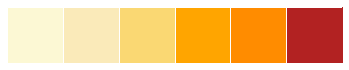

In [41]:
temps_colors = ["#FCF8D4", "#FAEAB9", "#FAD873", "#FFA500", "#FF8C00", "#B22222"]
sns.palplot(temps_colors)

In [42]:
temps_cmap = mpl.colors.LinearSegmentedColormap.from_list("temp colors", temps_colors)

Now let's take a look at the temperature data we have:

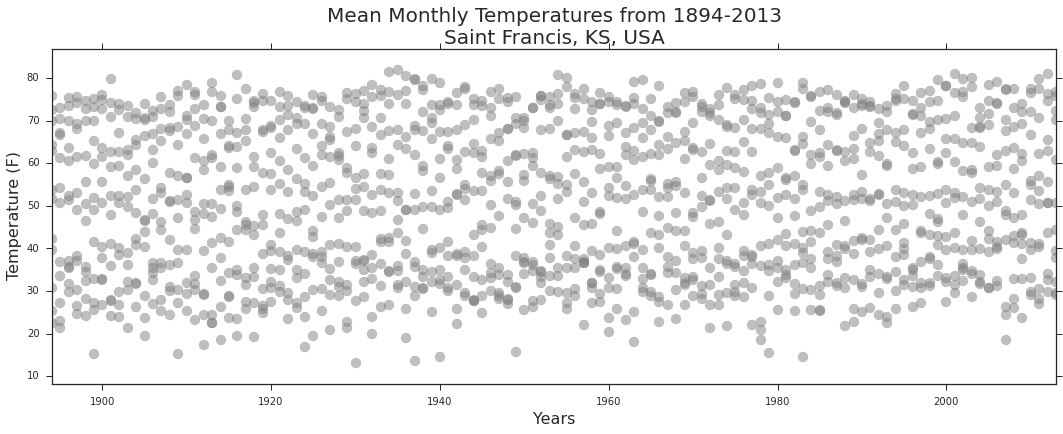

In [43]:
sns.set(style="ticks")

(figure, axes) = plt.subplots(figsize=(18,6))
scatter = axes.scatter(years, temps_degrees, s=100, color="0.5", alpha=0.5)
axes.set_xlim([years_min, years_max])
axes.set_ylim([temp_min - 5, temp_max + 5])
axes.set_title("Mean Monthly Temperatures from 1894-2013\nSaint Francis, KS, USA", fontsize=20)
axes.set_xlabel("Years", fontsize=16)
_ = axes.set_ylabel("Temperature (F)", fontsize=16)

Notice something? The banding around the minimum and maximum values looks to be trending upwards. The scatter plot makes it a bit hard to see, though. We're going to need to do some work to make sure we're not just seeing things.

So what do we want to do?
 * get the maximum and minimum values for every year
 * find the best fit line though those points
 * examine the slopes
 * compare the slopes
 
Let's do math!

There are a couple of conveniences we can take advantage of:
 * SciPy provides several options for linear (and polynomial!) fitting and regression
 * We can create a Pandas ``Series`` instance that represents our linear model and use it like the other Pandas objects we're working with in this section.

In [44]:
def get_fit(series, m, b):
    x = series.index
    y = m * x + b
    return pd.Series(y, x)

temps_max_x = temps.max().index
temps_max_y = temps.max().values
temps_min_x = temps.min().index
temps_min_y = temps.min().values

(temps_max_slope,
 temps_max_intercept,
 temps_max_r_value,
 temps_max_p_value,
 temps_max_std_err) = stats.linregress(temps_max_x, temps_max_y) 
temps_max_fit = get_fit(temps.max(), temps_max_slope, temps_max_intercept)

(temps_min_slope,
 temps_min_intercept,
 temps_min_r_value,
 temps_min_p_value,
 temps_min_std_err) = stats.linregress(temps_min_x, temps_min_y)
temps_min_fit = get_fit(temps.min(), temps_min_slope, temps_min_intercept)

Let's look at the slopes of the two:

In [45]:
(temps_max_slope, temps_min_slope)

(0.015674352385582326, 0.04552191124383638)

Quick refresher: the slope $m$ is defined as the change in $y$ values over the change in $x$ values:

\begin{align}
m = \frac{\Delta y}{\Delta x} = \frac{\text{vertical} \, \text{change} }{\text{horizontal} \, \text{change} }
\end{align}

In our case, the $y$ values are the minimum and maximum mean monthly temperatures in degrees Fahrenheit; the $x$ values are the years these measurements were taken.

The slope for the minimum mean monthly temperatures over the last 120 years is about 3 times greater than that of the maximum mean monthly temperatures:

In [46]:
temps_min_slope/temps_max_slope

2.9042291588205336

Let's go back to our scatter plot and superimpose our linear fits for the maximum and minimum annual means:

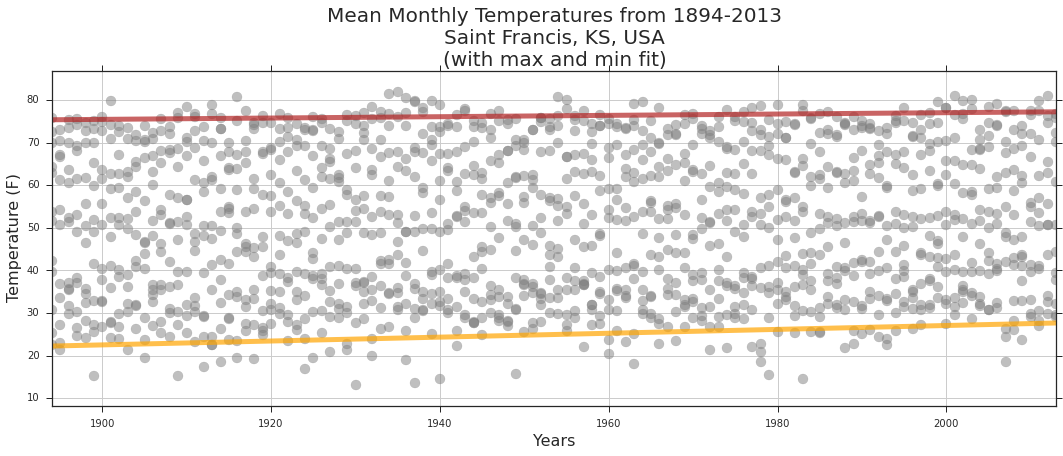

In [47]:
(figure, axes) = plt.subplots(figsize=(18,6))
scatter = axes.scatter(years, temps_degrees, s=100, color="0.5", alpha=0.5)
temps_max_fit.plot(ax=axes, lw=5, color=temps_colors[5], alpha=0.7)
temps_min_fit.plot(ax=axes, lw=5, color=temps_colors[3], alpha=0.7)
axes.set_xlim([years_min, years_max])
axes.set_ylim([temp_min - 5, temp_max + 5])
axes.set_title(("Mean Monthly Temperatures from 1894-2013\n"
                "Saint Francis, KS, USA\n(with max and min fit)"), fontsize=20)
axes.set_xlabel("Years", fontsize=16)
_ = axes.set_ylabel("Temperature (F)", fontsize=16)

By looking at at the gaps above and below the min and max fits, it seems like there is a greater rise in the minimums. We can get a better visual, though, by superimposing the two lines. Let's remove the vertical distance and compare:

In [48]:
diff_1894 = temps_max_fit.iloc[0] - temps_min_fit.iloc[0]
diff_2013 = temps_max_fit.iloc[-1] - temps_min_fit.iloc[-1]
(diff_1894, diff_2013)

(53.125096418732781, 49.573236914600542)

So that's the difference between the high and low for 1894 and then the difference in 2013. As we can see, the trend over the last century for this one weather station has been a lessening in the difference between the maximum and minimum values.

Let's shift the highs down by the difference in 2013 and compare the slopes overlaid:

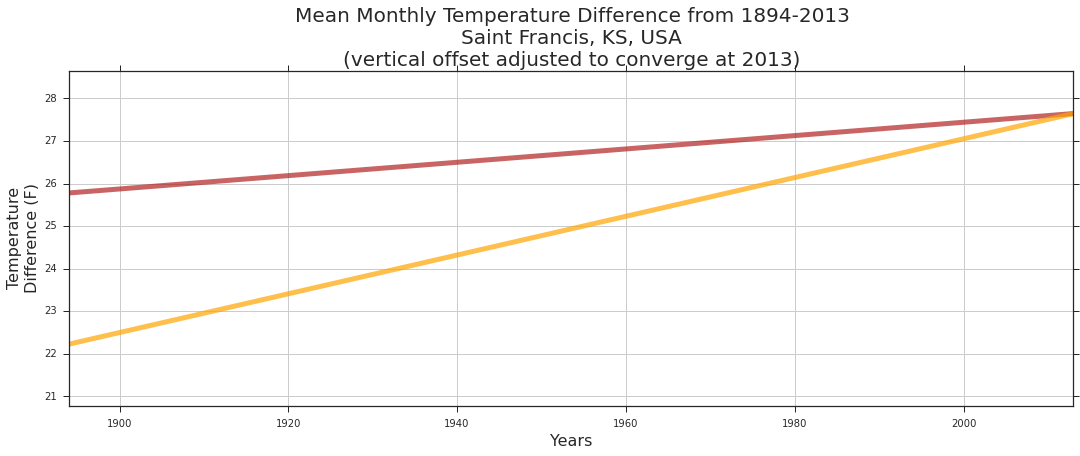

In [49]:
vert_shift = temps_max_fit - diff_2013

(figure, axes) = plt.subplots(figsize=(18,6))
vert_shift.plot(ax=axes, lw=5, color=temps_colors[5], alpha=0.7)
temps_min_fit.plot(ax=axes, lw=5, color=temps_colors[3], alpha=0.7)
axes.set_xlim([years_min, years_max])
axes.set_ylim([vert_shift.min() - 5, vert_shift.max() + 1])
axes.set_title(("Mean Monthly Temperature Difference from 1894-2013\n"
                "Saint Francis, KS, USA\n(vertical offset adjusted to converge at 2013)"), fontsize=20)
axes.set_xlabel("Years", fontsize=16)
_ = axes.set_ylabel("Temperature\nDifference (F)", fontsize=16)

*Now* you can see the difference!

Let's tweak our seaborn style for the next set of plots we'll be doing:

In [50]:
sns.set(style="darkgrid")

Seaborn offers some plots that are very useful when looking at lots of data:
 * heat maps
 * cluster maps (and the normalized variant)

Let's use the first one next, to get a sense of what the means temperatures look like for each month over the course of the given century -- without any analysis, just a visualization of the raw data.

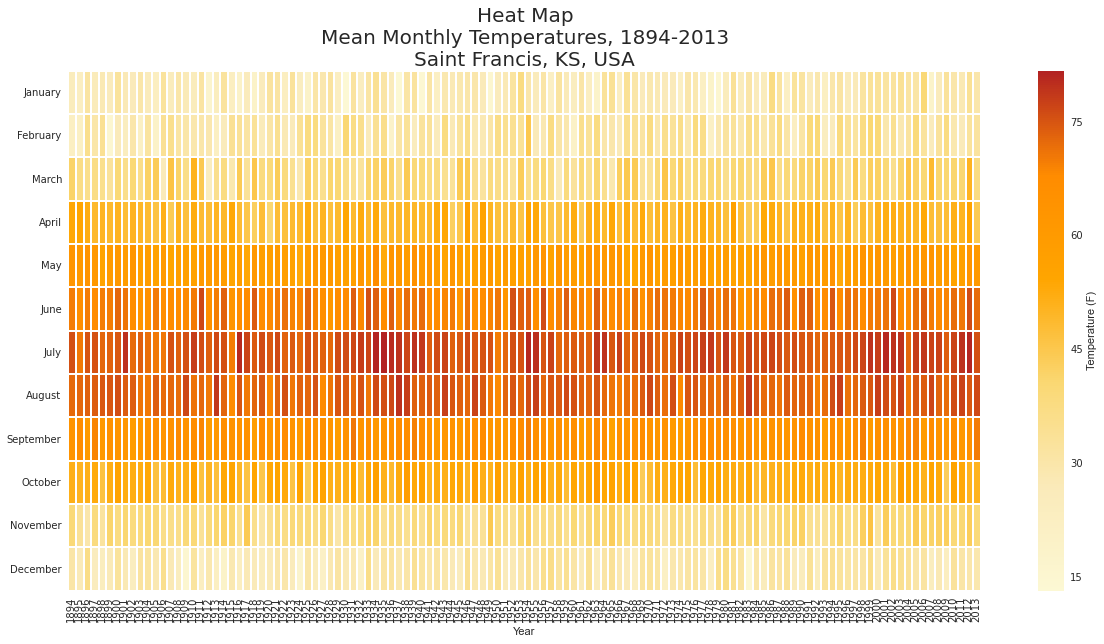

In [51]:
(figure, axes) = plt.subplots(figsize=(17,9))
axes.set_title(("Heat Map\nMean Monthly Temperatures, 1894-2013\n"
                "Saint Francis, KS, USA"), fontsize=20)
sns.heatmap(temps, cmap=temps_cmap, cbar_kws={"label": "Temperature (F)"})
figure.tight_layout()

If you want to render your plot as the book has published it, you can do the following instead:

```python
sns.set(font_scale=1.8)
(figure, axes) = plt.subplots(figsize=(17,9))
axes.set_title(("Heat Map\nMean Monthly Temperatures, 1894-2013\n"
                "Saint Francis, KS, USA"), fontsize=24)

xticks = temps.columns
keptticks = xticks[::int(len(xticks)/36)]
xticks = ['' for y in xticks]
xticks[::int(len(xticks)/36)] = keptticks

sns.heatmap(temps, linewidth=0, xticklabels=xticks, cmap=temps_cmap,
            cbar_kws={"label": "Temperature (F)"})
figure.tight_layout()
```

Given that this is a town in the Northern hemisphere near the 40th parallel, we don't see any surprises:
 * highest temperatures are in the summer
 * lowest temperatures are in the winter

There is some interesting summer banding in the 1930s which indicates several years of hotter-than-normal summers. There also seems to be a wide band of cold Decembers from 1907 through about 1932.

Next we're going to look at Seaborn's cluster map functionality. Cluster maps of this sort are very useful in sorting out data that may have hidden (or not) hierarchical structure. We don't expect that with this data set, so this is more an demonstration of the plot more than anything. However, it might have a few insights for us. We shall see.

Due to the fact that this is a composite plot, we'll need to access subplot axes as provided by the ``ClusterMap`` class.

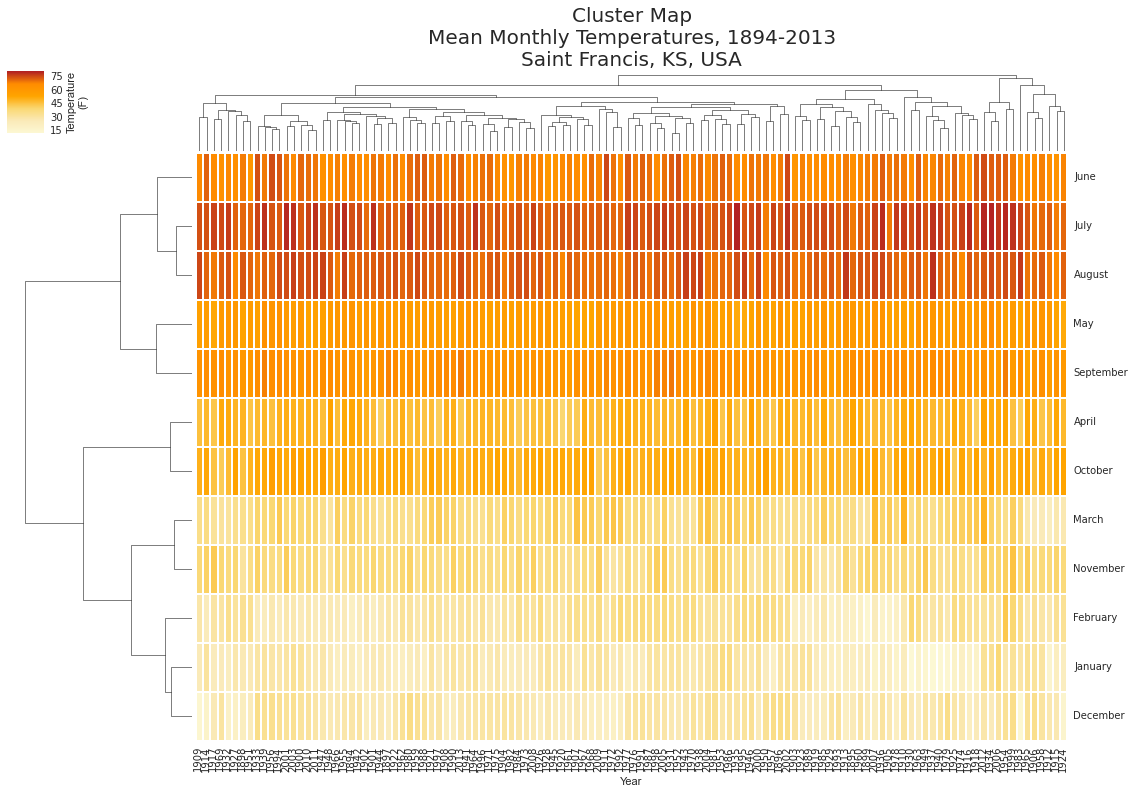

In [52]:
clustermap = sns.clustermap(
    temps, figsize=(19, 12), cbar_kws={"label": "Temperature\n(F)"}, cmap=temps_cmap)
_ = clustermap.ax_col_dendrogram.set_title(
        "Cluster Map\nMean Monthly Temperatures, 1894-2013\nSaint Francis, KS, USA",
        fontsize=20)

For the book version:

```python
sns.set(font_scale=1.5)
xticks = temps.columns
keptticks = xticks[::int(len(xticks)/36)]
xticks = ['' for y in xticks]
xticks[::int(len(xticks)/36)] = keptticks

clustermap = sns.clustermap(
    temps, figsize=(19, 12), linewidth=0, xticklabels=xticks,
                    cmap=temps_cmap, cbar_kws={"label": "Temperature\n(F)"})
_ = clustermap.ax_col_dendrogram.set_title(
        "Cluster Map\nMean Monthly Temperatures, 1894-2013\nSaint Francis, KS, USA",
        fontsize=24)
```

So here's what's happened here: while keeping the temperatures for each year together, the $x$ (years) and $y$ (months) values have been sorted/grouped to be close to those with which it shares the most similarity. Here's what we can discern from the graph with regard to our current data set:

* The century's temperature patterns each year can be viewed in two groups: higher and lower temperatures.
* January and December share similar low-temperature patterns, with the next-closest being February.
* The next grouping of similar temperature patterns are November and March, sibling to the Jan/Dec/Feb grouping.
* The last grouping of the low-temperature months is the April/October pairing.

A similar analysis (with no surprises) can be done for the high-temperature months.

Looking across the $x$-axis, we can view patterns/groupings by year. With careful tracing (ideally with a larger rendering of the cluster map), one could identify similar temperature patterns in various years. Though this doesn't reveal anything intrinsically, it could assist in additional analysis (e.g., pointing towards historical records to examine in the possibility the trends may be discovered).

There are two distinct bands that show up for two different groups of years. However, when rendering this image at twice its current width, the banding goes away; it's an artifact of this particular resolution (and the decreased spacing between the given years).

In the cluster map above, we passed a valuer for the color map to use, the one we defined at the beginning of this section. If we leave that out, seaborn will do something quite nice: it will normalize our data and then select a color map that highlights values above and below the mean.

Let's try that :-)

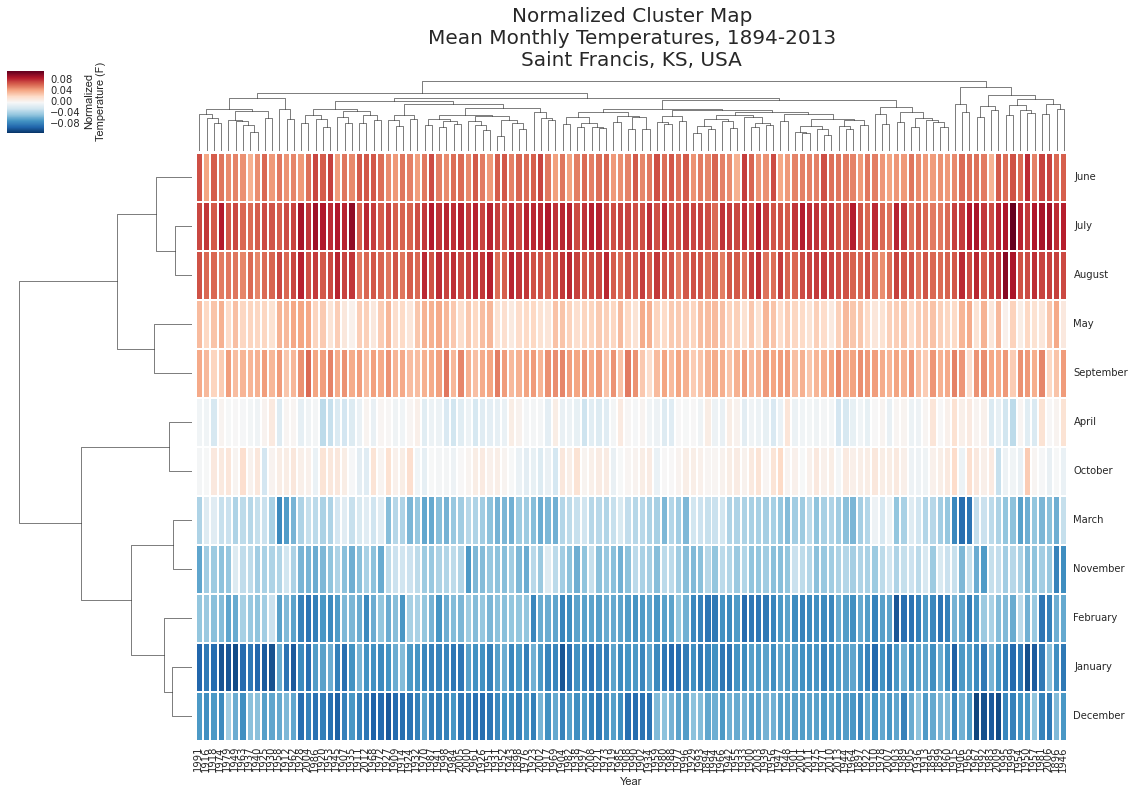

In [53]:
clustermap = sns.clustermap(
    temps, z_score=1, figsize=(19, 12),
    cbar_kws={"label": "Normalized\nTemperature (F)"})
_ = clustermap.ax_col_dendrogram.set_title(
        "Normalized Cluster Map\nMean Monthly Temperatures, 1894-2013\nSaint Francis, KS, USA",
        fontsize=20)

For the book version:

```python
sns.set(font_scale=1.5)
clustermap = sns.clustermap(
    temps, z_score=1, figsize=(19, 12), linewidth=0, xticklabels=xticks, 
    cbar_kws={"label": "Normalized\nTemperature (F)"})
_ = clustermap.ax_col_dendrogram.set_title(
        "Normalized Cluster Map\nMean Monthly Temperatures, 1894-2013\nSaint Francis, KS, USA",
        fontsize=24)
```

Note that we get the same grouping as in the previous heat map; the internal values at each coordinate of the map (and the associated color) are all that have changed. This view offers great insight for statistical data: not only do we see the large and obvious grouping between above and below the mean, but the colors give obvious insights as to how far any given point isfrom the overall mean.

With the next plot, we're going to return to two previous plots:
 * the temperature heat map
 * with the previous scatter plot for our temperature data
 
Seaborn has an option for  heat maps to display a histogram above them. We will see this usage when we examine the precipitation. However, for the temperatures, counts for a year isn't quite as meaningful as the actual values for each month of that year. As such, we will replace the standard histogram with our scatter plot:

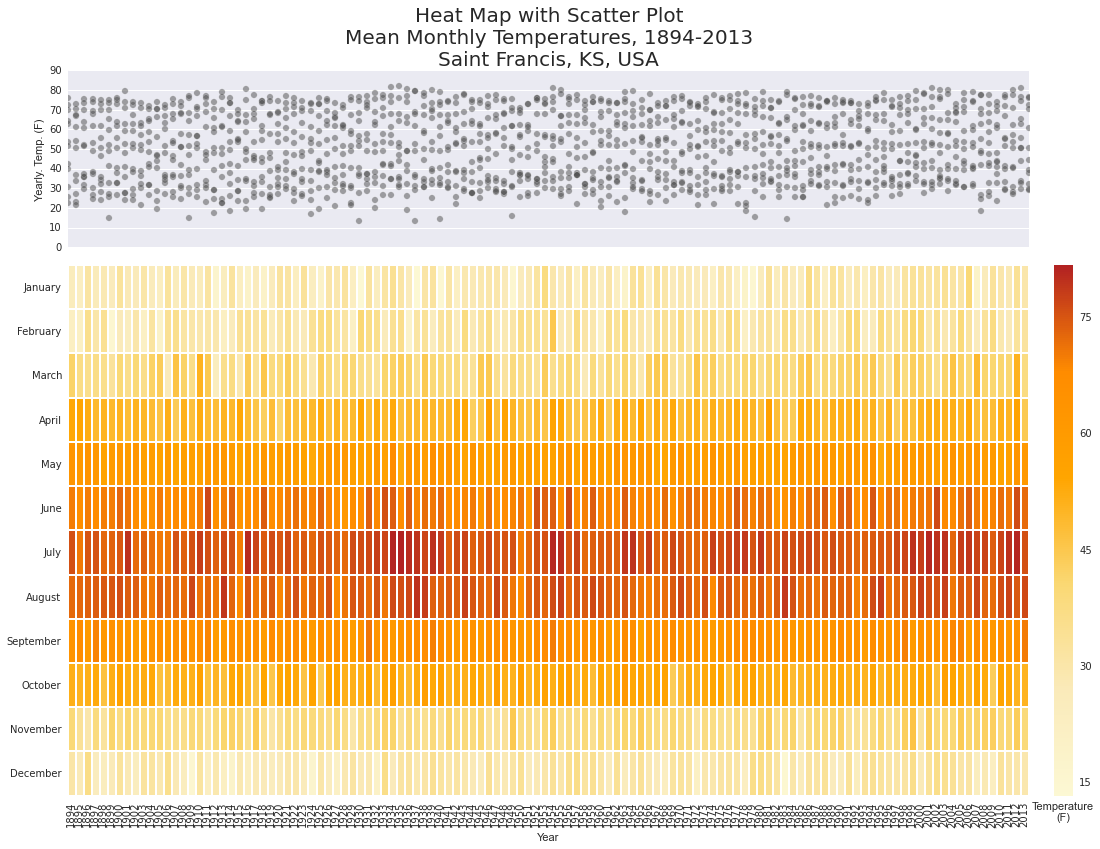

In [54]:
figure = plt.figure(figsize=(18,13))
grid_spec = plt.GridSpec(2, 2,
                         width_ratios=[50, 1],
                         height_ratios=[1, 3],
                         wspace=0.05, hspace=0.05)
scatter_axes = figure.add_subplot(grid_spec[0])
cluster_axes = figure.add_subplot(grid_spec[2])
colorbar_axes = figure.add_subplot(grid_spec[3])

scatter_axes.scatter(years,
                     temps_degrees,
                     s=40,
                     c="0.3",
                     alpha=0.5)
scatter_axes.set(xticks=[], ylabel="Yearly. Temp. (F)")
scatter_axes.set_xlim([years_min, years_max])
scatter_axes.set_title(
    "Heat Map with Scatter Plot\nMean Monthly Temperatures, 1894-2013\nSaint Francis, KS, USA",
    fontsize=20)
sns.heatmap(temps,
            cmap=temps_cmap,
            ax=cluster_axes,
            cbar_ax=colorbar_axes,
            cbar_kws={"orientation": "vertical"})
_ = colorbar_axes.set(xlabel="Temperature\n(F)")

For the book version:

```python
sns.set(font_scale=1.8)
figure = plt.figure(figsize=(18,13))
grid_spec = plt.GridSpec(2, 2,
                         width_ratios=[50, 1],
                         height_ratios=[1, 3],
                         wspace=0.05, hspace=0.05)
scatter_axes = figure.add_subplot(grid_spec[0])
cluster_axes = figure.add_subplot(grid_spec[2])
colorbar_axes = figure.add_subplot(grid_spec[3])

scatter_axes.scatter(years,
                     temps_degrees,
                     s=40,
                     c="0.3",
                     alpha=0.5)
scatter_axes.set(xticks=[], ylabel="Yearly. Temp. (F)")
scatter_axes.set_xlim([years_min, years_max])
scatter_axes.set_title(
    "Heat Map with Scatter Plot\nMean Monthly Temperatures, 1894-2013\nSaint Francis, KS, USA",
    fontsize=20)
sns.heatmap(temps,
            cmap=temps_cmap,
            ax=cluster_axes,
            linewidth=0, xticklabels=xticks, 
            cbar_ax=colorbar_axes,
            cbar_kws={"label": "Temperature\n(F)"})
```

No new insights here, rather a demonstration of combining two views of the same data for easier examination and exploration of trends.

Next, let's take a closer look at average monthly temperatures by month using a histogram matrix.

To do this, we'll need a new pivot. Our first one created a pivot with the "Month" data being the index; now we want to index by "Year". We'll do the same trick of keeping the data in the correct month-order by converting the month numbers to names *after* we create the pivot table ... but in the case of the histogram matrix plot, that won't actually help us: to keep the sorting correct, we'll need to pre-pend the zero-filled month number:

In [55]:
temps2 = data_raw.pivot("Year", "Month", "Mean Temperature (F)")
temps2.columns = [str(x).zfill(2) + " - " + calendar.month_name[x] for x in temps2.columns]
monthly_means = temps2.mean()
temps2.head()

01 - January  02 - February  03 - March  04 - April  05 - May  \
Year                                                                  
1894          25.4           22.5        42.1        53.7      62.9   
1895          23.0           21.3        36.8        54.2      61.1   
1896          31.6           35.5        35.6        52.2      63.6   
1897          26.5           30.3        37.0        49.1      61.5   
1898          28.0           34.4        35.6        50.4      55.6   

      06 - June  07 - July  08 - August  09 - September  10 - October  \
Year                                                                    
1894       69.8       75.8         72.5            64.3          51.7   
1895       66.5       70.4         72.9            67.1          50.7   
1896       69.9       75.2         73.5            60.5          51.3   
1897       68.0       75.5         74.1            69.1          53.1   
1898       69.9       72.7         74.7            61.6          46.5   

      11 - November  12 - December  
Year                                
1894           39.7           30.6  
1895           33.6           27.2  
1896           29.8           37.0  
1897           38.2           24.7  
1898           32.4           24.2

Now we're ready for our histogram. We'll use the histogram provided by Pandas for this.

Unfortunately, Pandas does not return the figure and axes that it creates with its ``hist`` wrapper. Instead, it returns an NumPy array of subplots. As such, we're left with fewer options than we might like for further tweaking of the plot. Our use below of ``plt.text`` is a quick hack (of trial and error) that lets us label the overall figure (instead of the enclosing axes, as we'd prefer).

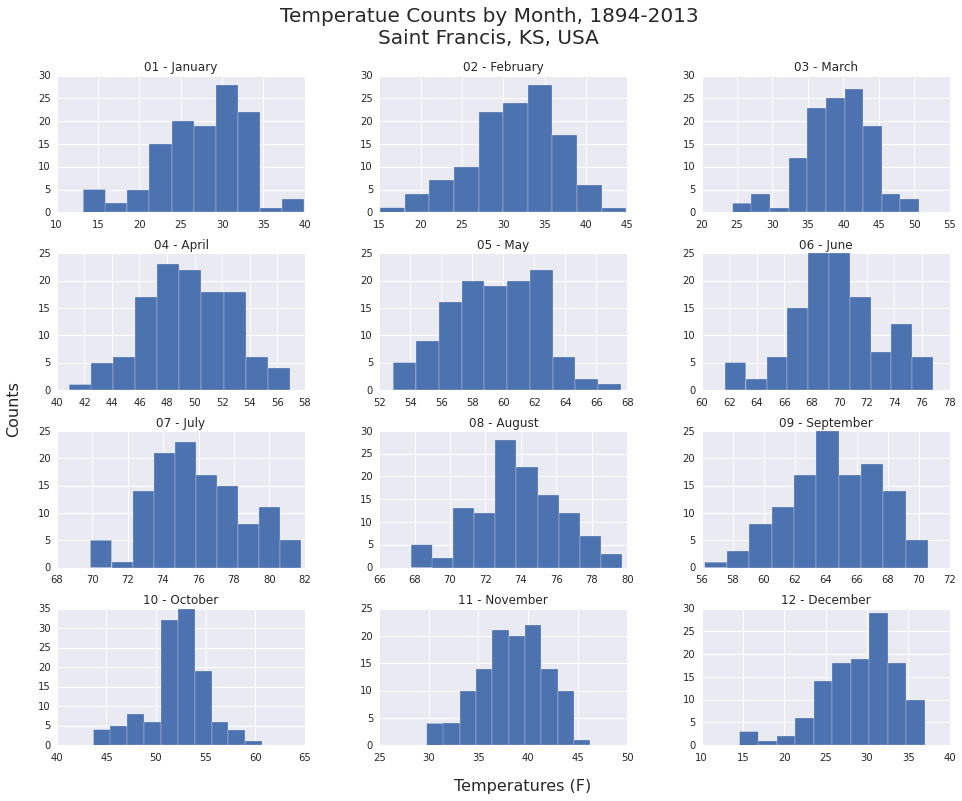

In [56]:
axes = temps2.hist(figsize=(16,12))
plt.text(-20, -10, "Temperatures (F)", fontsize=16)
plt.text(-74, 77, "Counts", rotation="vertical", fontsize=16)
_ = plt.suptitle("Temperatue Counts by Month, 1894-2013\nSaint Francis, KS, USA", fontsize=20)

This provides a nice view on the number of occurrences for temperature ranges in each month over the course of the century.

Now what we'd like to do is:
 * look at the mean temperature for *all* months over the century
 * but also show the constituent data that generated that mean
 * and trace the max, mean, and min temperatures
 
Let's tackle that last one first. The min, max, and means are are discrete values in our case, one for each month. What we'd like to do is see what a smooth curve through those points might look like (as a visual aid more than anything). SciPy provides just the thing: spline interpolation. This will give us a smooth curve for our discrete values:

In [57]:
from scipy.interpolate import UnivariateSpline

smooth_mean = UnivariateSpline(month_nums, list(monthly_means), s=0.5)
means_xs = np.linspace(0, 13, 2000)
means_ys = smooth_mean(means_xs)

smooth_maxs = UnivariateSpline(month_nums, list(temps2.max()), s=0)
maxs_xs = np.linspace(0, 13, 2000)
maxs_ys = smooth_maxs(maxs_xs)

smooth_mins = UnivariateSpline(month_nums, list(temps2.min()), s=0)
mins_xs = np.linspace(0, 13, 2000)
mins_ys = smooth_mins(mins_xs)

We'll use the raw data from the beginning of this section, since we'll be doing interpolation on our $x$ values (month numbers):

In [58]:
temps3 = data_raw[["Month", "Mean Temperature (F)"]]

Now we can plot our means for all months, a scatter plot (as lines, in this case) for each month superimposed over each mean, and finally our max/mean/min interpolations:

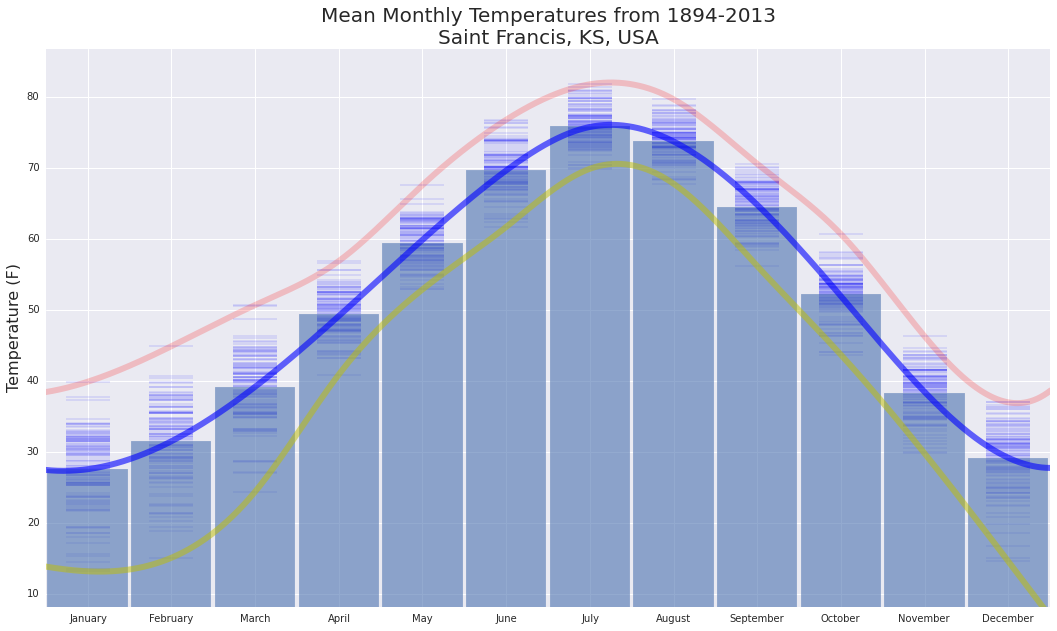

In [59]:
(figure, axes) = plt.subplots(figsize=(18,10))
axes.bar(month_nums, monthly_means, width=0.96, align="center", alpha=0.6)
axes.scatter(temps3["Month"], temps3["Mean Temperature (F)"], s=2000, marker="_", alpha=0.6)
axes.plot(means_xs, means_ys, "b", linewidth=6, alpha=0.6)
axes.plot(maxs_xs, maxs_ys, "r", linewidth=6, alpha=0.2)
axes.plot(mins_xs, mins_ys, "y", linewidth=6, alpha=0.5)
axes.axis((0.5, 12.5, temps_degrees.min() - 5, temps_degrees.max() + 5))
axes.set_title("Mean Monthly Temperatures from 1894-2013\nSaint Francis, KS, USA", fontsize=20)
axes.set_xticks(month_nums)
axes.set_xticklabels(month_names)
_ = axes.set_ylabel("Temperature (F)", fontsize=16)

When we created our by-month pivot (the assigned to the ``temps2`` variable), we provided ourselves with the means to easily look at statistical data for each month. We'll print out the highlights below so we can look at the numbers in preparation for sanity checking our visuals on the next plot:

In [60]:
temps2.max()

01 - January      39.9
02 - February     44.9
03 - March        50.7
04 - April        56.9
05 - May          67.6
06 - June         76.8
07 - July         81.8
08 - August       79.7
09 - September    70.6
10 - October      60.7
11 - November     46.3
12 - December     37.0
dtype: float64

In [61]:
temps2.mean()

01 - January      27.590833
02 - February     31.495833
03 - March        39.091667
04 - April        49.491667
05 - May          59.458333
06 - June         69.779167
07 - July         75.891667
08 - August       73.818333
09 - September    64.537500
10 - October      52.211667
11 - November     38.362500
12 - December     29.207500
dtype: float64

In [62]:
temps2.min()

01 - January      13.2
02 - February     15.1
03 - March        24.4
04 - April        40.9
05 - May          52.9
06 - June         61.7
07 - July         69.9
08 - August       67.8
09 - September    56.2
10 - October      43.7
11 - November     29.8
12 - December     14.6
dtype: float64

We've seen those above (in various forms). We haven't seen the standard deviation for this data yet, though:

In [63]:
temps2.std()

01 - January      5.154080
02 - February     5.345263
03 - March        4.715014
04 - April        3.074552
05 - May          2.936287
06 - June         3.168646
07 - July         2.598790
08 - August       2.463003
09 - September    2.942989
10 - October      3.024999
11 - November     3.418734
12 - December     4.513196
dtype: float64

Have a good look at those numbers; we're going to use them to make sure that our box plot results make sense in the next plot.

What is a box plot? The box plot was invented by the famous statistical mathematician John Tukey (the inventor of many important concepts, he is often forgotten as the person who coined the term "bit"). Box plots concisely and visually convey the following "bits" (couldn't resist) of information:
 * upper part of the box: approximate distribution, 75th percentile
 * line across box: median
 * lower part of the box: approximate distribution, 25th percentile
 * height of the box: fourth spread
 * upper line out of box: greatest non-outlying value
 * lower line out of box: smallest non-outlying value
 * dots above and below: outliers

Sometimes you will see box plots of different width; the width indicates the relative size of the data sets.

The box plot allows one to view data without any assumptions having made about it; the basic statistics are there to view, in plain sight.

Our next plot will overlay a box plot on our barchart of medians (and line scatter plot of values).

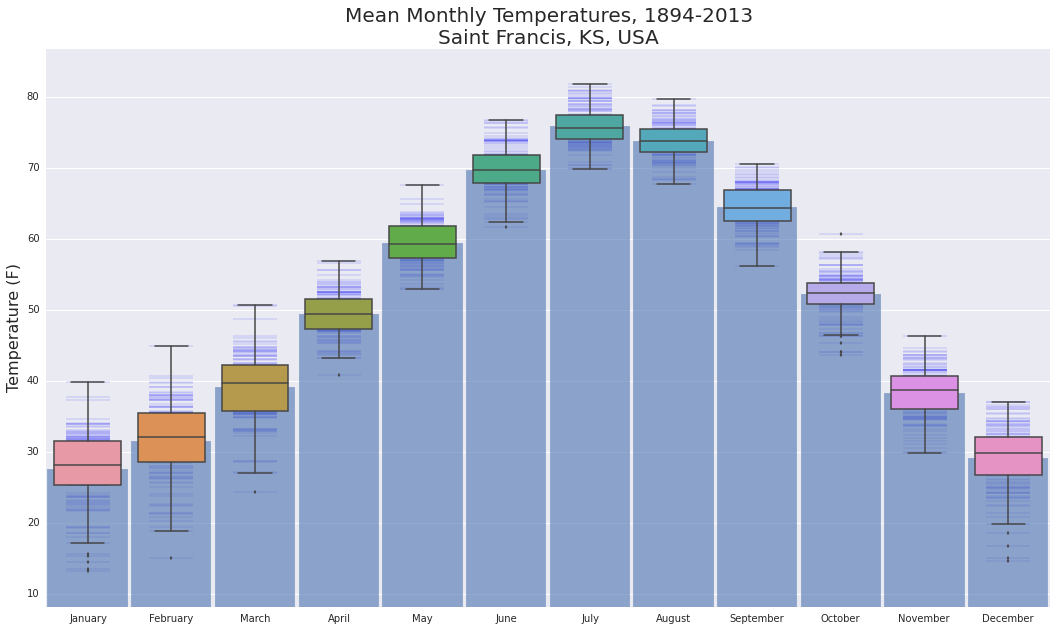

In [64]:
(figure, axes) = plt.subplots(figsize=(18,10))
axes.bar(month_nums, monthly_means, width=0.96, align="center", alpha=0.6)
axes.scatter(temps3["Month"], temps3["Mean Temperature (F)"], s=2000, marker="_", alpha=0.6)
sns.boxplot(temps2, ax=axes)
axes.axis((0.5, 12.5, temps_degrees.min() - 5, temps_degrees.max() + 5))
axes.set_title("Mean Monthly Temperatures, 1894-2013\nSaint Francis, KS, USA", fontsize=20)
axes.set_xticks(month_nums)
axes.set_xticklabels(month_names)
_ = axes.set_ylabel("Temperature (F)", fontsize=16)

Now we can easily identify the spread, the outliers, the area that contains 50% of the distribution, etc.

The violin plot, as previously mentioned, is a variation on the box plot, it's shape indicating the probability distribution of the data in that particular set. We will configure it to show our data points as lines (the "stick" option), thus combining our use of the line-scatter plot above with the box plot.

Let's see this same data as a violin plot:

In [65]:
sns.set(style="whitegrid")

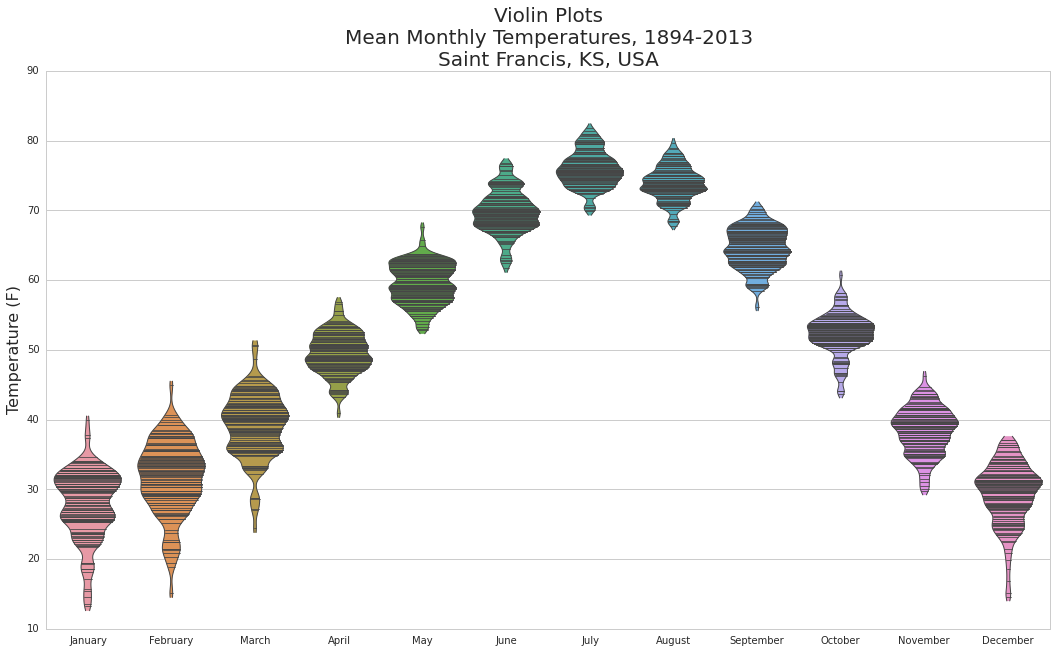

In [66]:
(figure, axes) = plt.subplots(figsize=(18, 10))
sns.violinplot(temps2, bw=0.2, lw=1, inner="stick")
axes.set_title(("Violin Plots\nMean Monthly Temperatures, 1894-2013\n"
                "Saint Francis, KS, USA"), fontsize=20)
axes.set_xticks(month_nums)
axes.set_xticklabels(month_names)
_ = axes.set_ylabel("Temperature (F)", fontsize=16)

With the next plot, *Andrews' curves*, we reach the end of the section on temperature analysis.

The application of [Andrews' curves](http://www.jucs.org/jucs_11_11/visualization_of_high_dimensional/jucs_11_11_1806_1819_garc_a_osorio.pdf) to this particular data set is a bit forced. It's a more useful analysis tool when applied to data sets with higher dimensionality, due to the fact that the computed curves can reveal structure (grouping/clustering) where it might not otherwise be (as) evident.

We're essentially looking at just two dimensions here:
 * temperature
 * month

As we have already seen above, there is not a lot of unexpected (or unexplained) structure in this data. A data set that included wind speed and air pressure might render much more interesting results in an Andrews' curve ...

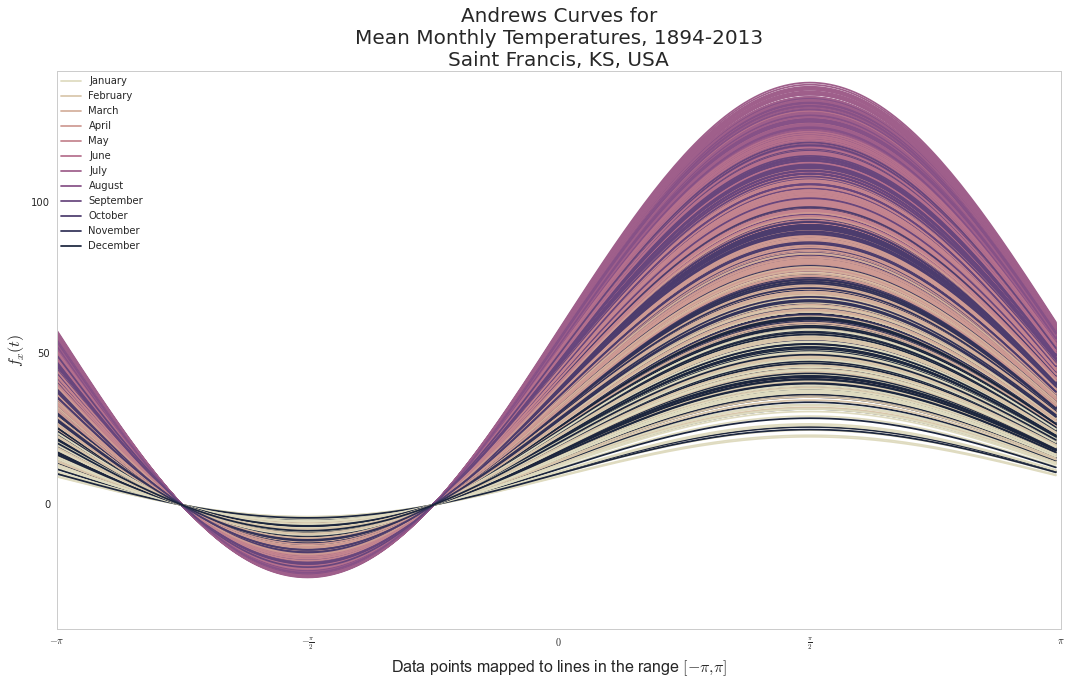

In [67]:
months_cmap = sns.cubehelix_palette(8, start=-0.5, rot=0.75, as_cmap=True)

(figure, axes) = plt.subplots(figsize=(18, 10))
temps4 = data_raw[["Mean Temperature (F)", "Month"]]
axes.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
axes.set_xticklabels([r"$-{\pi}$", r"$-\frac{\pi}{2}$", r"$0$", r"$\frac{\pi}{2}$", r"${\pi}$"])
axes.set_title("Andrews Curves for\nMean Monthly Temperatures, 1894-2013\nSaint Francis, KS, USA", fontsize=20)
axes.set_xlabel(r"Data points mapped to lines in the range $[-{\pi},{\pi}]$", fontsize=16)
axes.set_ylabel(r"$f_{x}(t)$", fontsize=16)
pd.tools.plotting.andrews_curves(
    temps4, class_column="Month", ax=axes,
    colormap=months_cmap)
axes.axis([-np.pi, np.pi] + [x * 1.025 for x in axes.axis()[2:]])
_ = axes.legend(labels=month_names, loc=(0, 0.67))

Andrews' curves are groups of lines where each line represents a point in the input data set. The line itself is a the plot of a finite Fourier series, as defined below (taken from the paper linked above).

Each data point $x = \left \{ x_1, x_2, \ldots x_d \right \}$ defines a finite Fourier series:

\begin{align}
f_x(t) = \frac{x_1}{\sqrt 2} + x_2 \sin(t) + x_3 \cos(t) + x_4 \sin(2t) + x_5 \cos(2t) + \ldots
\end{align}

This function is then plotted for $-\pi < t < \pi$. Thus each data point may be viewed as a line between $-\pi$ and $\pi$. This formula can be thought of as the projection of the data point onto the vector:

\begin{align}
\left ( \frac{1}{\sqrt 2}, \sin(t), \cos(t), \sin(2t), \cos(2t), \ldots \right )
\end{align}

If we examine the rendered curves, we see the same patterns we identified in the cluster map plots:
 * the temperatures of January and December are similar (thus the light and dark banding)
 * likewise for the temperatures during the summer months

Notice that the curves preserve the distance between the high and low temperatures. This is another property of the curves. Other include:
 * the mean is preserved
 * linear relationships are preserved
 * the variance is preserved

Things to keep in mind when using Andrews' curves in your projects:
 * the order of the variables matters; changing that order will result in different curves
 * the lower frequencies show up better; as such, put the variables you feel to be more important first
 
For example, if we *did* have a data set with atmospheric pressure and wind speed, we might have defined our Pandas ``DataFrame`` with the columns in this order:

```python
temps4 = data_raw[["Mean Temperature (F)", "Wind Speed (kn)", "Pressure (Pa)", "Month"]]
```

This concludes the section on temperature analysis. Next we will look precipitation. For the most part, the notes and comments are the same; as such, we will not repeat the text, but merely run through the examples without interruption or commentary.

### Analysis of Precipitation, 1894-2013

In [68]:
sns.set(style="darkgrid")

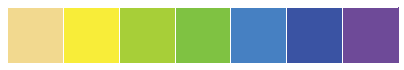

In [69]:
precips_colors = ["#f2d98f", "#f8ed39", "#a7cf38", "#7fc242", "#4680c2", "#3a53a3", "#6e4a98"]
sns.palplot(precips_colors)

In [70]:
precips_cmap = mpl.colors.LinearSegmentedColormap.from_list("precip colors", precips_colors)

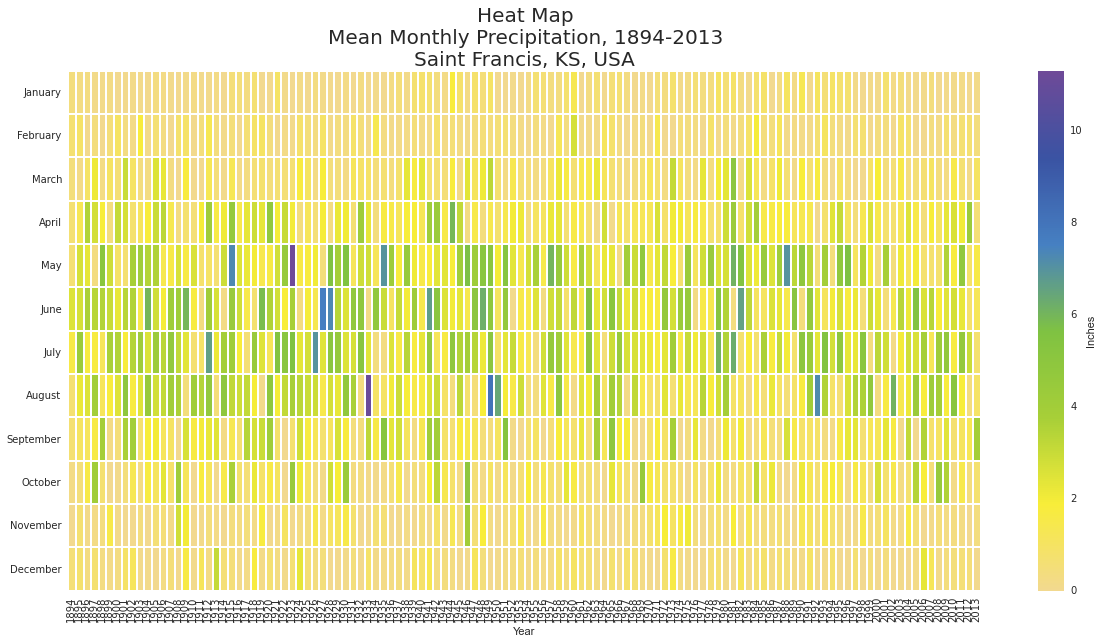

In [71]:
(figure, axes) = plt.subplots(figsize=(17,9))
axes.set_title(("Heat Map\nMean Monthly Precipitation, 1894-2013\n"
                "Saint Francis, KS, USA"), fontsize=20)
sns.heatmap(precips, cmap=precips_cmap, cbar_kws={"label": "Inches"})
figure.tight_layout()

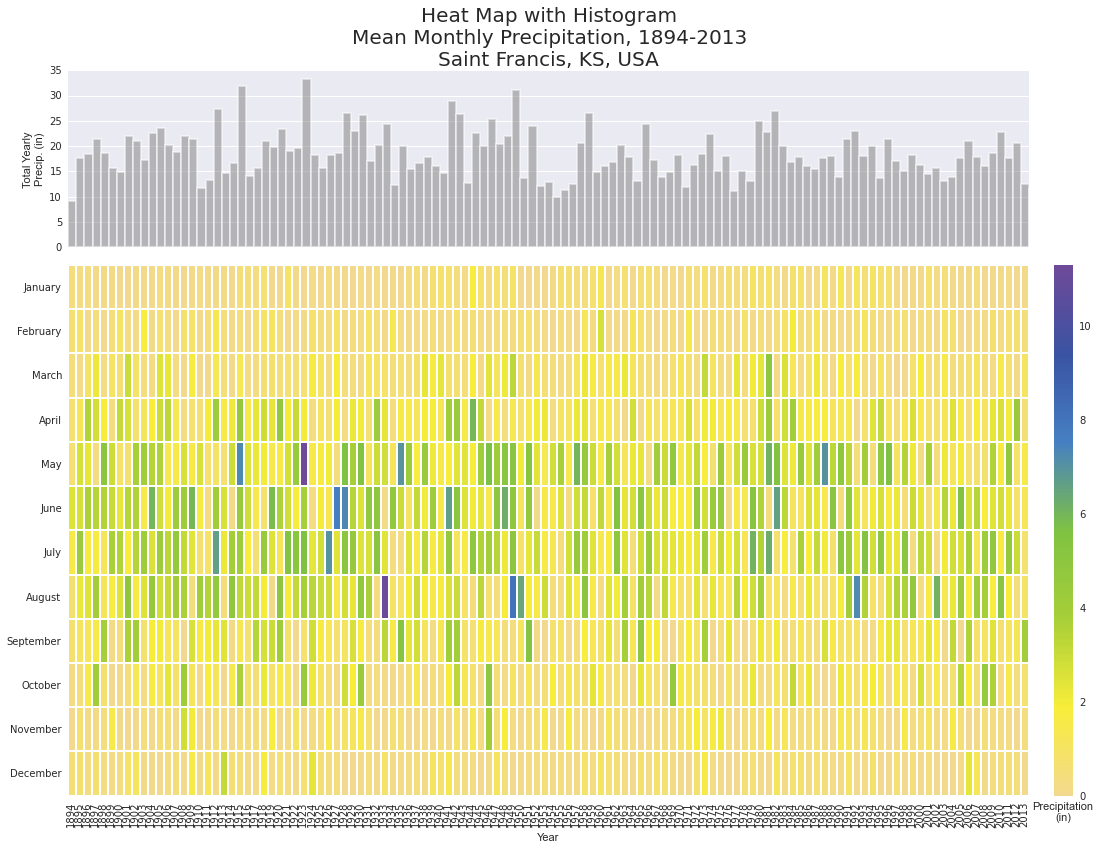

In [72]:
figure = plt.figure(figsize=(18, 13))
grid_spec = plt.GridSpec(2, 2,
                         width_ratios=[50, 1],
                         height_ratios=[1, 3],
                         wspace=0.05, hspace=0.05)
hist_axes = figure.add_subplot(grid_spec[0])
cluster_axes = figure.add_subplot(grid_spec[2])
colorbar_axes = figure.add_subplot(grid_spec[3])

precips_sum = precips.sum(axis=0)
years_unique = data["Year"].unique()
hist_axes.bar(years_unique, precips_sum, 1,
              ec="w", lw=2, color="0.5", alpha=0.5)
hist_axes.set(xticks=[], ylabel="Total Yearly\nPrecip. (in)")
hist_axes.set_xlim([years_min, years_max])
hist_axes.set_title(
    "Heat Map with Histogram\nMean Monthly Precipitation, 1894-2013\nSaint Francis, KS, USA",
    fontsize=20)

sns.heatmap(precips,
            cmap=precips_cmap,
            ax=cluster_axes,
            cbar_ax=colorbar_axes,
            cbar_kws={"orientation": "vertical"})
_ = colorbar_axes.set(xlabel="Precipitation\n(in)")

For the book version:

```python
sns.set(font_scale=1.8)
figure = plt.figure(figsize=(18, 13))
grid_spec = plt.GridSpec(2, 2,
                         width_ratios=[50, 1],
                         height_ratios=[1, 3],
                         wspace=0.05, hspace=0.05)
hist_axes = figure.add_subplot(grid_spec[0])
cluster_axes = figure.add_subplot(grid_spec[2])
colorbar_axes = figure.add_subplot(grid_spec[3])

precips_sum = precips.sum(axis=0)
years_unique = data["Year"].unique()
hist_axes.bar(years_unique, precips_sum, 1,
              ec="w", lw=2, color="0.5", alpha=0.5)
hist_axes.set(xticks=[], ylabel="Total Yearly\nPrecip. (in)")
hist_axes.set_xlim([years_min, years_max])
hist_axes.set_title(
    "Heat Map with Histogram\nMean Monthly Precipitation, 1894-2013\nSaint Francis, KS, USA",
    fontsize=24)

xticks = precips.columns
keptticks = xticks[::int(len(xticks)/36)]
xticks = ['' for y in xticks]
xticks[::int(len(xticks)/36)] = keptticks

_ = sns.heatmap(precips,
            cmap=precips_cmap,
            ax=cluster_axes,
            linewidth=0, xticklabels=xticks, 
            cbar_ax=colorbar_axes,
            cbar_kws={"label": "Precipitation\n(in)"})
```

Our historgram gives a nice view of the average precipitation, and we notice immediately that 1923 is the year in this data set with the highest average. A quick google for "kansas rain 1923" lands us on [this USGS page](http://ks.water.usgs.gov/major-floods-along-the-arkansas-river) which discusses major floods along the Arkansas River:

<blockquote>
<strong>June 8-9, 1923</strong><br/><br/>

In June 1923, the entire drainage area between Hutchinson and Arkansas City received excessive rains. On June 8 and 9, Wichita reported 7.06 inches, Newton 5.75 inches, and Arkansas City 2.06 inches. Excessive precipitation fell over all of the Little Arkansas, Ninnescah, and Chikaskia River Basins as well as the Arkansas River Valley, and major flooding occurred on all of the affected streams. Wichita and Arkansas City were severely damaged. In Wichita, 6 square miles were inundated. At Arkansas City, two lives were lost, and property damage was estimated in the millions (Kansas Water Resources Board, 1960). Flood stages on the Ninnescah were the highest known.
</blockquote>

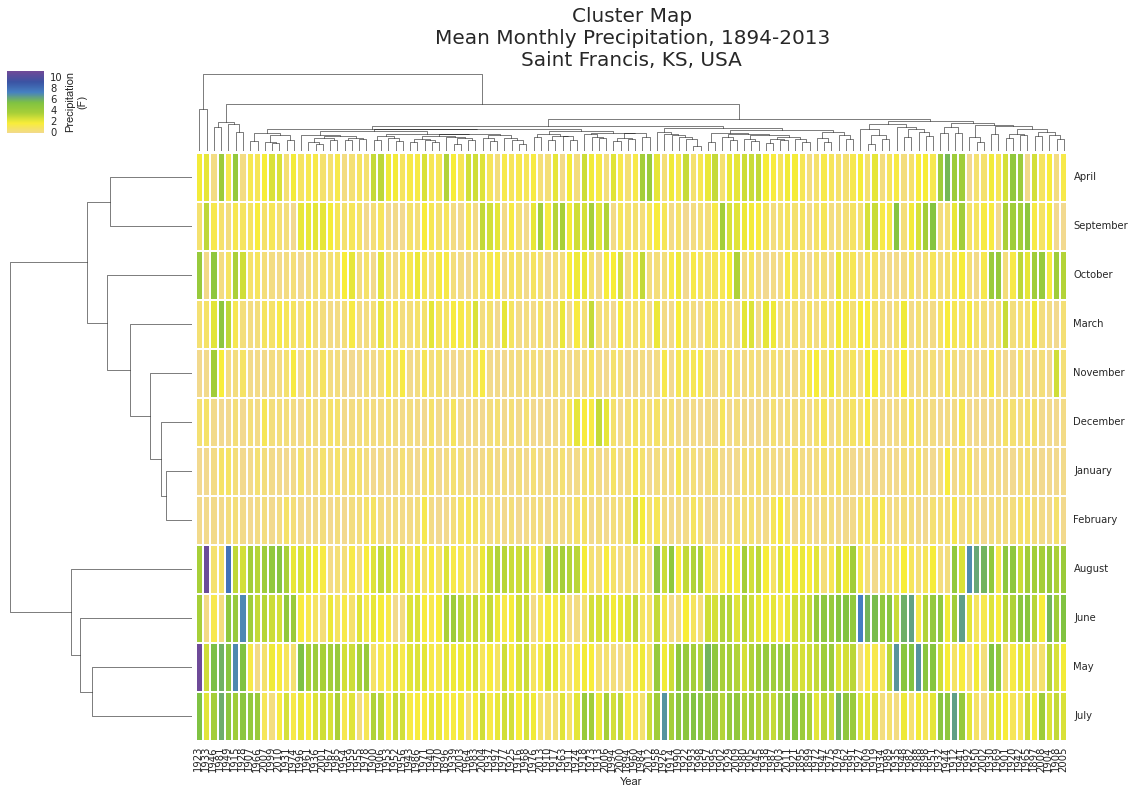

In [73]:
clustermap = sns.clustermap(
    precips, figsize=(19, 12), cbar_kws={"label": "Precipitation\n(F)"}, cmap=precips_cmap)
_ = clustermap.ax_col_dendrogram.set_title(
        "Cluster Map\nMean Monthly Precipitation, 1894-2013\nSaint Francis, KS, USA",
        fontsize=20)

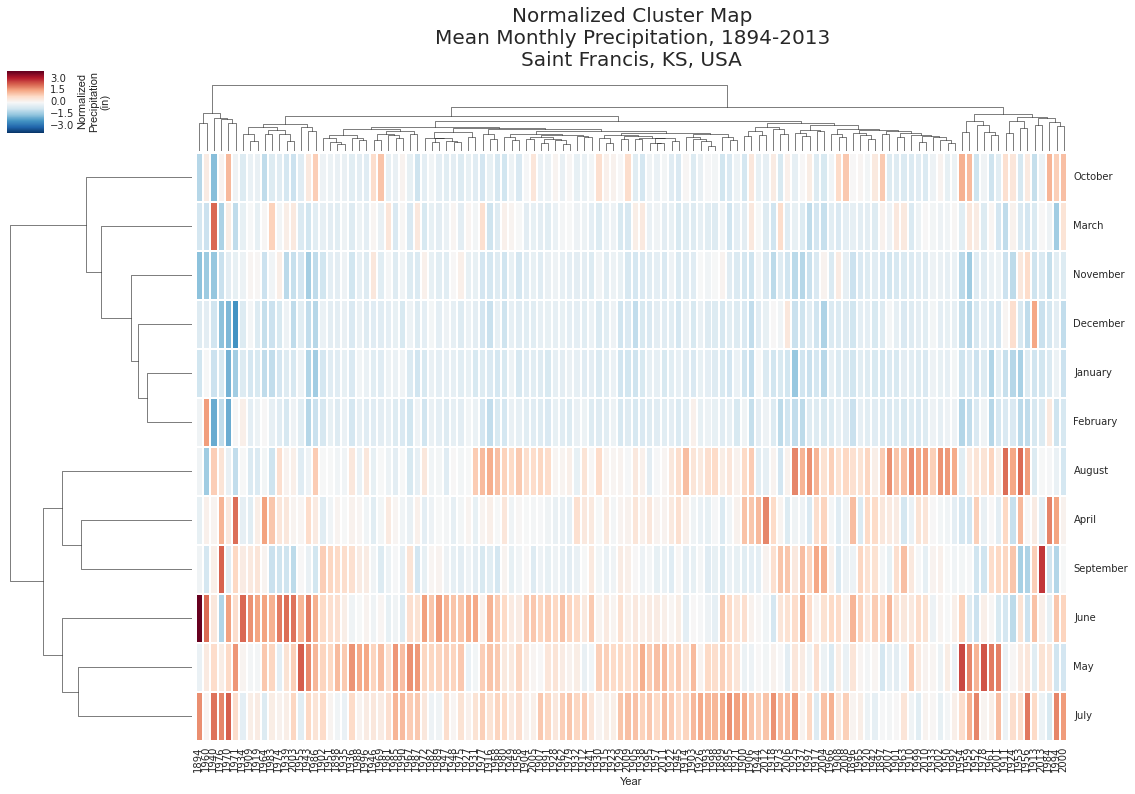

In [74]:
clustermap = sns.clustermap(
    precips, z_score=1, figsize=(19, 12),
    cbar_kws={"label": "Normalized\nPrecipitation\n(in)"})
_ = clustermap.ax_col_dendrogram.set_title(
        "Normalized Cluster Map\nMean Monthly Precipitation, 1894-2013\nSaint Francis, KS, USA",
        fontsize=20)

In [75]:
precips2 = data_raw.pivot("Year", "Month", "Precipitation (in)")
precips2.columns = [str(x).zfill(2) + " - " + calendar.month_name[x] for x in precips2.columns]
monthly_means = precips2.mean()
precips2.head()

01 - January  02 - February  03 - March  04 - April  05 - May  \
Year                                                                  
1894          0.43           0.69        0.45        0.62      0.64   
1895          0.30           0.89        0.21        1.24      2.70   
1896          0.31           0.08        0.95        3.54      2.34   
1897          0.17           0.42        2.16        2.75      0.32   
1898          0.16           0.05        0.27        1.90      5.14   

      06 - June  07 - July  08 - August  09 - September  10 - October  \
Year                                                                    
1894       2.54       1.59         0.69            0.69          0.26   
1895       2.70       4.36         2.24            1.03          0.48   
1896       3.71       1.72         2.56            1.14          1.55   
1897       3.38       1.69         3.94            1.61          4.04   
1898       3.50       1.17         1.16            3.87          0.68   

      11 - November  12 - December  
Year                                
1894           0.03           0.54  
1895           0.69           0.76  
1896           0.14           0.31  
1897           0.23           0.67  
1898           0.37           0.34

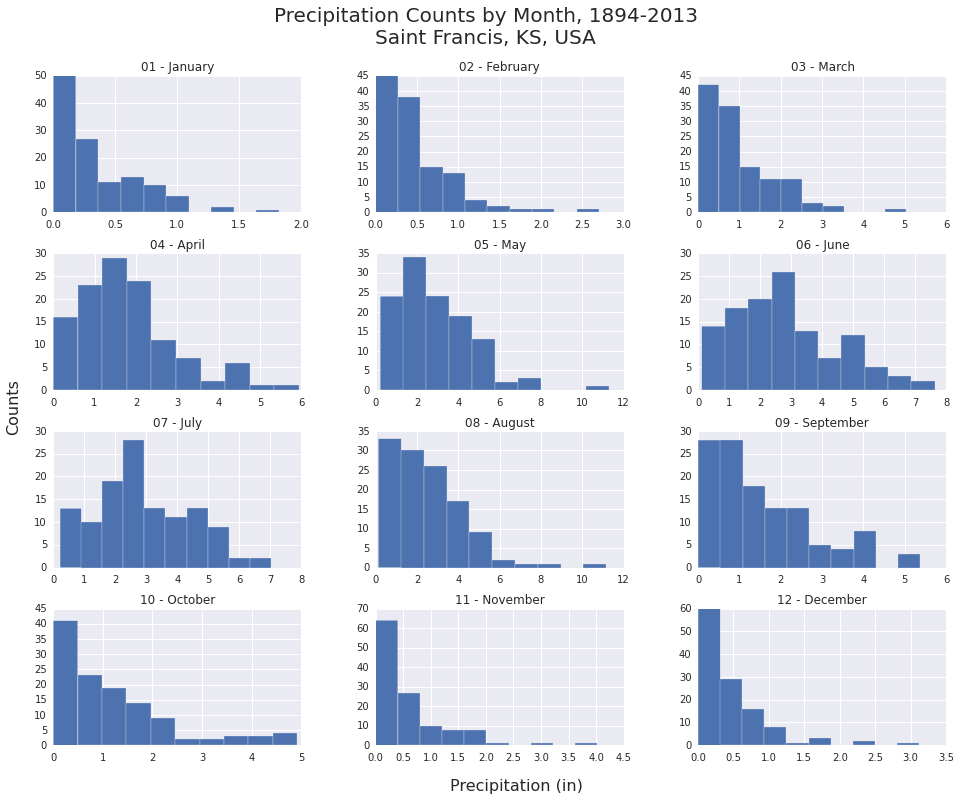

In [76]:
axes = pd.tools.plotting.hist_frame(precips2, figsize=(16,12))
plt.text(-3.5, -20, "Precipitation (in)", fontsize=16)
plt.text(-9.75, 155, "Counts", rotation="vertical", fontsize=16)
_ = plt.suptitle("Precipitation Counts by Month, 1894-2013\nSaint Francis, KS, USA", fontsize=20)

In [77]:
from scipy.interpolate import UnivariateSpline

smooth_mean = UnivariateSpline(month_nums, list(monthly_means), s=0.5)
means_xs = np.linspace(0, 13, 2000)
means_ys = smooth_mean(means_xs)

smooth_maxs = UnivariateSpline(month_nums, list(precips2.max()), s=1)
maxs_xs = np.linspace(-5, 14, 2000)
maxs_ys = smooth_maxs(maxs_xs)

smooth_mins = UnivariateSpline(month_nums, list(precips2.min()), s=0.25)
mins_xs = np.linspace(0, 13, 2000)
mins_ys = smooth_mins(mins_xs)

In [78]:
precips3 = data_raw[["Month", "Precipitation (in)"]]

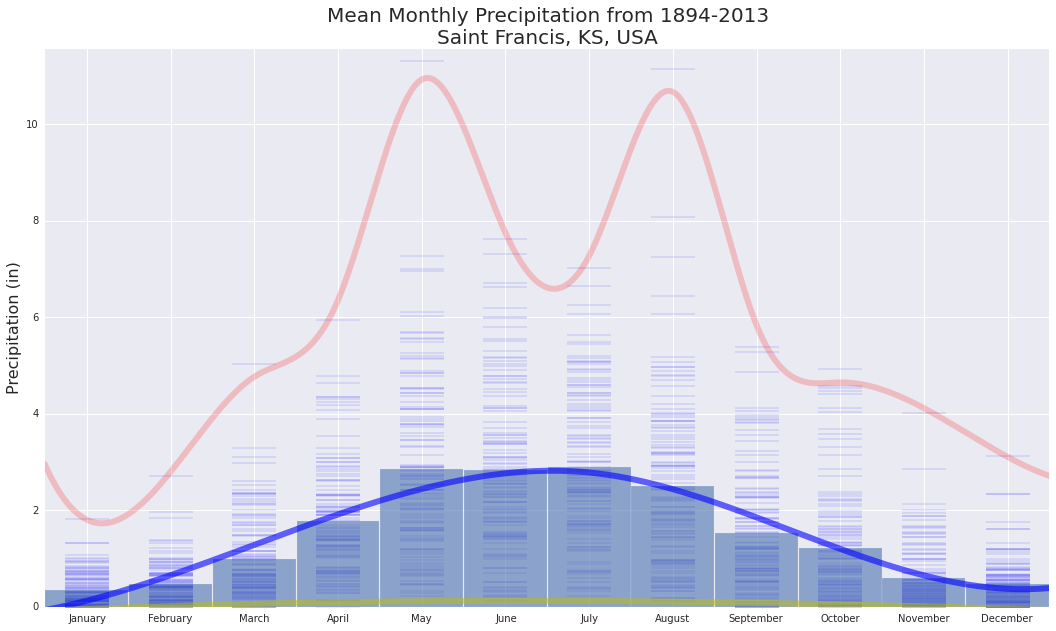

In [79]:
(figure, axes) = plt.subplots(figsize=(18,10))
axes.bar(month_nums, monthly_means, width=0.99, align="center", alpha=0.6)
axes.scatter(precips3["Month"], precips3["Precipitation (in)"], s=2000, marker="_", alpha=0.6)
axes.plot(means_xs, means_ys, "b", linewidth=6, alpha=0.6)
axes.plot(maxs_xs, maxs_ys, "r", linewidth=6, alpha=0.2)
axes.plot(mins_xs, mins_ys, "y", linewidth=6, alpha=0.5)
axes.axis((0.5, 12.5, precips_inches.min(), precips_inches.max() + 0.25))
axes.set_title("Mean Monthly Precipitation from 1894-2013\nSaint Francis, KS, USA", fontsize=20)
axes.set_xticks(month_nums)
axes.set_xticklabels(month_names)
_ = axes.set_ylabel("Precipitation (in)", fontsize=16)

In [80]:
precips2.max()

01 - January       1.82
02 - February      2.70
03 - March         5.03
04 - April         5.94
05 - May          11.31
06 - June          7.63
07 - July          7.02
08 - August       11.15
09 - September     5.38
10 - October       4.92
11 - November      4.02
12 - December      3.12
dtype: float64

In [81]:
precips2.mean()

01 - January      0.355083
02 - February     0.471083
03 - March        0.989500
04 - April        1.775667
05 - May          2.856917
06 - June         2.828250
07 - July         2.888167
08 - August       2.501333
09 - September    1.532583
10 - October      1.211167
11 - November     0.593750
12 - December     0.476833
dtype: float64

In [82]:
precips2.min()

01 - January      0.00
02 - February     0.00
03 - March        0.00
04 - April        0.00
05 - May          0.22
06 - June         0.12
07 - July         0.22
08 - August       0.13
09 - September    0.00
10 - October      0.00
11 - November     0.00
12 - December     0.00
dtype: float64

In [83]:
precips2.std()

01 - January      0.338794
02 - February     0.432454
03 - March        0.855160
04 - April        1.155705
05 - May          1.825643
06 - June         1.687242
07 - July         1.539335
08 - August       1.779772
09 - September    1.250379
10 - October      1.170235
11 - November     0.656293
12 - December     0.512086
dtype: float64

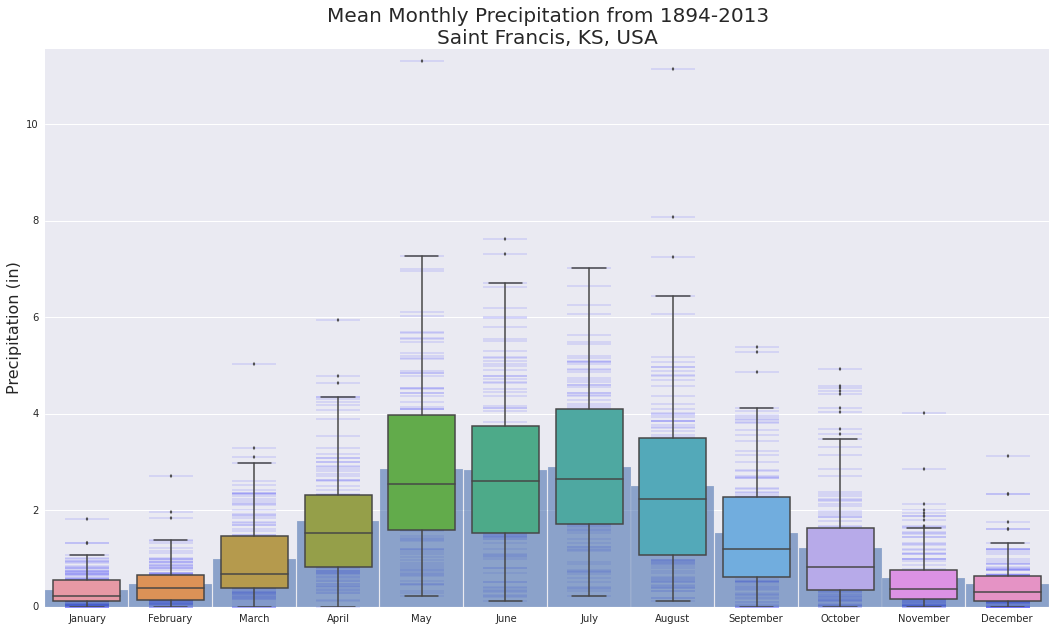

In [84]:
(figure, axes) = plt.subplots(figsize=(18,10))
axes.bar(month_nums, monthly_means, width=0.99, align="center", alpha=0.6)
axes.scatter(precips3["Month"], precips3["Precipitation (in)"], s=2000, marker="_", alpha=0.6)
sns.boxplot(precips2, ax=axes)
axes.axis((0.5, 12.5, precips_inches.min(), precips_inches.max() + 0.25))
axes.set_title("Mean Monthly Precipitation from 1894-2013\nSaint Francis, KS, USA", fontsize=20)
axes.set_xticks(month_nums)
axes.set_xticklabels(month_names)
_ = axes.set_ylabel("Precipitation (in)", fontsize=16)

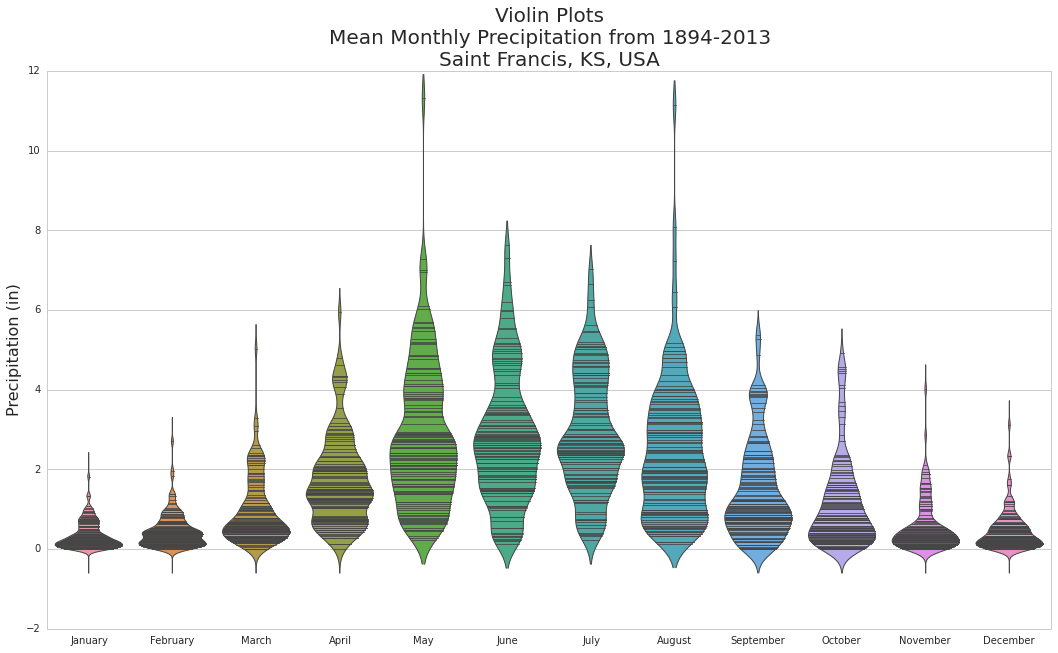

In [85]:
sns.set(style="whitegrid")

(figure, axes) = plt.subplots(figsize=(18, 10))
sns.violinplot(precips2, bw=0.2, lw=1, inner="stick")
axes.set_title(("Violin Plots\nMean Monthly Precipitation from 1894-2013\n"
                "Saint Francis, KS, USA"), fontsize=20)
axes.set_xticks(month_nums)
axes.set_xticklabels(month_names)
_ = axes.set_ylabel("Precipitation (in)", fontsize=16)

In [86]:
sns.set(style="darkgrid")

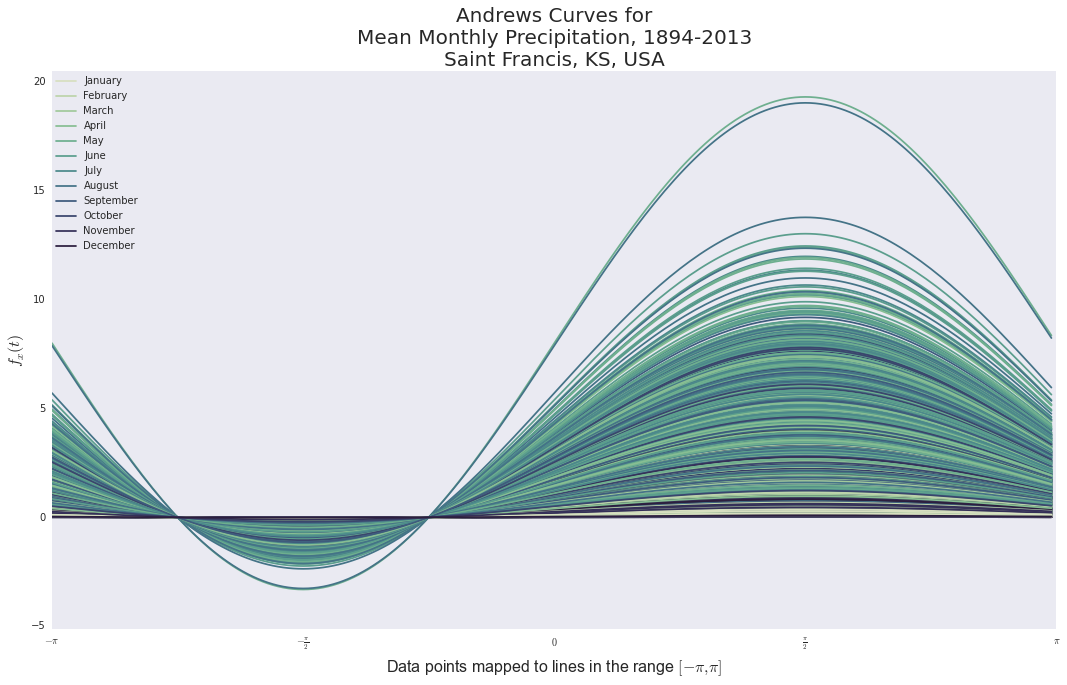

In [87]:
(figure, axes) = plt.subplots(figsize=(18, 10))
precips4 = data_raw[["Precipitation (in)", "Month"]]
axes.set_xlim([-np.pi, np.pi])
axes.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
axes.set_xticklabels([r"$-{\pi}$", r"$-\frac{\pi}{2}$", r"$0$", r"$\frac{\pi}{2}$", r"${\pi}$"])
axes.set_title("Andrews Curves for\nMean Monthly Precipitation, 1894-2013\nSaint Francis, KS, USA", fontsize=20)
axes.set_xlabel(r"Data points mapped to lines in the range $[-{\pi},{\pi}]$", fontsize=16)
axes.set_ylabel(r"$f_{x}(t)$", fontsize=16)
axes = pd.tools.plotting.andrews_curves(
           precips4, class_column="Month", ax=axes,
           colormap=sns.cubehelix_palette(8, start=0.5, rot=-0.75, as_cmap=True))
axes.axis([-np.pi, np.pi] + [x * 1.025 for x in axes.axis()[2:]])
_ = axes.legend(labels=month_names, loc=(0, 0.67))